# Red Neuronal Convolucional para Clasificación de MNIST

Vamos a crear una red neuronal convolucional pequeña (aunque más compleja que un perceptrón multicapa) para clasificar el conjunto de datos MNIST (reconocimiento de caracteres numéricos) usando sólo NumPy. Implementaremos todo desde cero, incluyendo:

* Pasada hacia adelante
* Función de pérdida (entropía cruzada)
* Retropropagación del error
* Actualización de parámetros

Ejecute la celda, pero estudie el código y el texto para comprender el funcionamiento.

Cargando MNIST...
Train: 50400, Val: 5600, Test: 14000


Entrenando:   0%|          | 0/35 [00:00<?, ?epoch/s]

Época 1/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 2/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 3/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 4/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 5/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 6/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 7/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 8/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 9/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 10/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 11/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 12/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 13/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 14/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 15/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 16/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 17/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 18/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 19/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 20/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 21/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 22/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 23/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 24/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 25/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 26/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 27/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 28/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 29/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 30/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 31/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 32/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 33/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 34/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 35/35:   0%|          | 0/788 [00:00<?, ?batch/s]

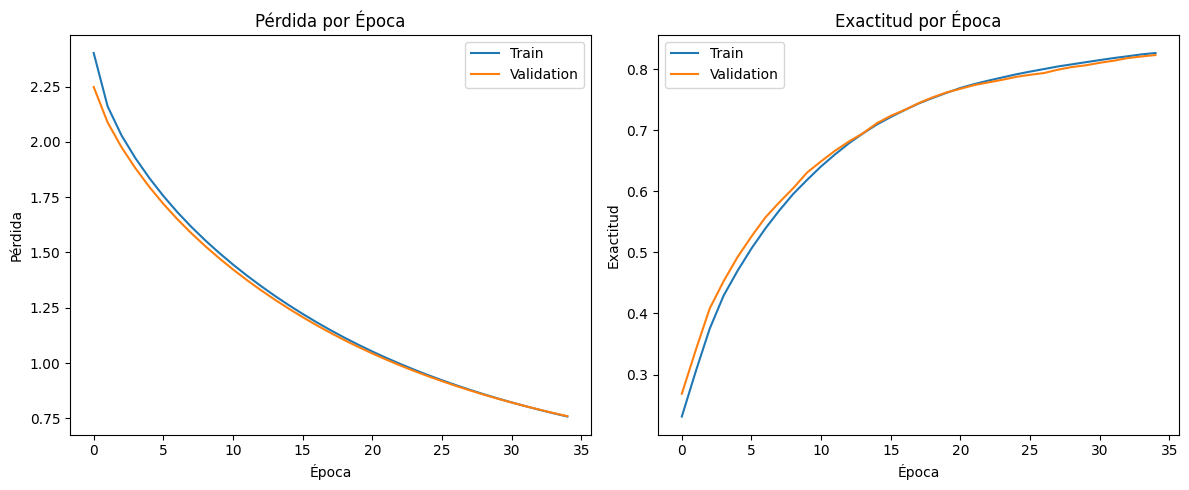


Evaluación en Test:

Exactitud: 0.8310714285714286

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1381
           1       0.85      0.96      0.90      1575
           2       0.87      0.82      0.84      1398
           3       0.80      0.82      0.81      1428
           4       0.81      0.77      0.79      1365
           5       0.85      0.64      0.73      1263
           6       0.86      0.92      0.89      1375
           7       0.87      0.87      0.87      1459
           8       0.79      0.76      0.77      1365
           9       0.74      0.79      0.76      1391

    accuracy                           0.83     14000
   macro avg       0.83      0.83      0.83     14000
weighted avg       0.83      0.83      0.83     14000



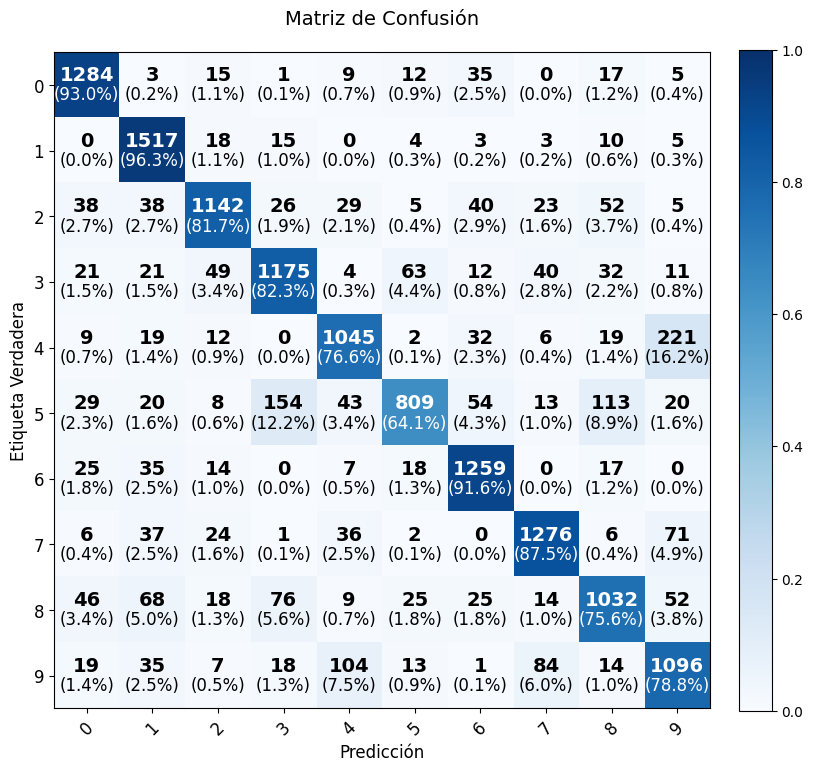

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# 0. Función para la matriz de confusión
def plot_combined_confusion_matrix(cm, classes, title='Matriz de Confusión'):
    """Matriz combinada con valores absolutos y relativos"""
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 8))
    plt.imshow(cm_norm, interpolation='nearest', cmap='Blues', vmin=0, vmax=1)
    plt.title(title, pad=20, fontsize=14)
    plt.colorbar(fraction=0.046, pad=0.04)

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=12)
    plt.yticks(tick_marks, classes, fontsize=12)

    # Umbral para color del texto
    thresh = 0.5

    # Añadir valores absolutos y porcentajes
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i-0.15, f"{cm[i, j]}",  # Valor absoluto arriba
                 ha='center', va='center',
                 color='white' if cm_norm[i, j] > thresh else 'black',
                 fontsize=14, fontweight='bold')

        plt.text(j, i+0.15, f"({cm_norm[i, j]:.1%})",  # Porcentaje abajo
                 ha='center', va='center',
                 color='white' if cm_norm[i, j] > thresh else 'black',
                 fontsize=12)

    plt.tight_layout()
    plt.ylabel('Etiqueta Verdadera', fontsize=12)
    plt.xlabel('Predicción', fontsize=12)
    plt.show()

# 1. Cargar y preparar datos de MNIST
def load_mnist_data(test_size=0.2, val_size=0.1, random_state=42):
    """
    Carga MNIST y divide en train/val/test
    Args:
        test_size: Proporción para test
        val_size: Proporción de validación (del train)
        random_state: Semilla para reproducibilidad
    Returns:
        X_train, X_val, X_test, y_train, y_val, y_test
    """
    print("Cargando MNIST...")
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X, y = mnist.data, mnist.target.astype(int)

    # Normalizar y redimensionar para CNN (28x28x1)
    X = X.reshape(-1, 28, 28, 1).astype('float32') / 255.0

    # Dividir en train+val y test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state)

    # Dividir train en train y val
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=val_size, stratify=y_train, random_state=random_state)

    print(f"Train: {X_train.shape[0]}, Val: {X_val.shape[0]}, Test: {X_test.shape[0]}")
    return X_train, X_val, X_test, y_train, y_val, y_test

# 2. Capas de la CNN
class Conv2D:
    """Capa convolucional 2D"""
    def __init__(self, filters, kernel_size, input_shape, padding='same', activation='relu'):
        """
        Args:
            filters: Número de filtros
            kernel_size: Tamaño del kernel (e.g., 3)
            input_shape: Forma del input (height, width, channels)
            padding: 'same' o 'valid'
            activation: 'relu' o None
        """
        self.filters = filters
        self.kernel_size = kernel_size
        self.padding = padding
        self.activation = activation

        # Inicializar pesos (He initialization)
        fan_in = kernel_size * kernel_size * input_shape[-1]
        self.W = np.random.randn(kernel_size, kernel_size, input_shape[-1], filters) * np.sqrt(2./fan_in)
        self.b = np.zeros(filters)

        # Calcular output shape
        if padding == 'same':
            self.output_shape = (input_shape[0], input_shape[1], filters)
        else:
            self.output_shape = (input_shape[0]-kernel_size+1, input_shape[1]-kernel_size+1, filters)

    def forward(self, X):
        """Forward pass"""
        self.X = X
        batch_size, h, w, _ = X.shape

        # Aplicar padding si es necesario
        if self.padding == 'same':
            pad = self.kernel_size // 2
            X_padded = np.pad(X, ((0,0), (pad,pad), (pad,pad), (0,0)), mode='constant')
        else:
            X_padded = X

        # Inicializar output
        output = np.zeros((batch_size, *self.output_shape))

        # Convolución
        for i in range(self.output_shape[0]):
            for j in range(self.output_shape[1]):
                receptive_field = X_padded[:, i:i+self.kernel_size, j:j+self.kernel_size, :]
                output[:, i, j, :] = np.tensordot(receptive_field, self.W, axes=([1,2,3], [0,1,2])) + self.b

        # Activación
        if self.activation == 'relu':
            output = np.maximum(0, output)

        return output

    def backward(self, dZ, lr):
        """Backward pass"""
        batch_size, h, w, _ = dZ.shape
        dW = np.zeros_like(self.W)
        db = np.zeros_like(self.b)
        dX = np.zeros_like(self.X)

        # Aplicar padding si es necesario
        if self.padding == 'same':
            pad = self.kernel_size // 2
            X_padded = np.pad(self.X, ((0,0), (pad,pad), (pad,pad), (0,0)), mode='constant')
            dX_padded = np.zeros_like(X_padded)
        else:
            X_padded = self.X
            dX_padded = dX

        # Gradientes
        for i in range(h):
            for j in range(w):
                receptive_field = X_padded[:, i:i+self.kernel_size, j:j+self.kernel_size, :]

                # Gradiente de los pesos
                dW += np.tensordot(receptive_field, dZ[:, i, j, :], axes=([0], [0]))

                # Gradiente del input (si es necesario)
                if self.padding != 'valid' or (i < dX.shape[1] and j < dX.shape[2]):
                    dX_padded[:, i:i+self.kernel_size, j:j+self.kernel_size, :] += np.tensordot(
                        dZ[:, i, j, :], self.W, axes=([1], [3]))

        # Gradiente de los biases
        db = np.sum(dZ, axis=(0,1,2))

        # Quitar padding si es necesario
        if self.padding == 'same':
            pad = self.kernel_size // 2
            dX = dX_padded[:, pad:-pad, pad:-pad, :] if pad > 0 else dX_padded
        else:
            dX = dX_padded

        # Actualizar pesos
        self.W -= lr * dW / batch_size
        self.b -= lr * db / batch_size

        return dX

class MaxPool2D:
    """Capa de Max Pooling 2D"""
    def __init__(self, pool_size=2):
        self.pool_size = pool_size
        self.mask = None

    def forward(self, X):
        """Forward pass"""
        self.X = X
        batch_size, h, w, channels = X.shape
        self.output_shape = (batch_size, h//self.pool_size, w//self.pool_size, channels)
        output = np.zeros(self.output_shape)
        self.mask = np.zeros_like(X)

        for i in range(0, h, self.pool_size):
            for j in range(0, w, self.pool_size):
                receptive_field = X[:, i:i+self.pool_size, j:j+self.pool_size, :]
                output[:, i//self.pool_size, j//self.pool_size, :] = np.max(receptive_field, axis=(1,2))

                # Guardar máscara para backprop
                max_vals = np.max(receptive_field, axis=(1,2), keepdims=True)
                self.mask[:, i:i+self.pool_size, j:j+self.pool_size, :] = (receptive_field == max_vals)

        return output

    def backward(self, dZ):
        """Backward pass"""
        dX = np.zeros_like(self.X)
        batch_size, h_out, w_out, channels = dZ.shape

        for i in range(h_out):
            for j in range(w_out):
                h_start = i * self.pool_size
                w_start = j * self.pool_size

                # Propagamos el gradiente solo a los máximos
                dX[:, h_start:h_start+self.pool_size, w_start:w_start+self.pool_size, :] = \
                    self.mask[:, h_start:h_start+self.pool_size, w_start:w_start+self.pool_size, :] * \
                    dZ[:, i:i+1, j:j+1, :]

        return dX

class Flatten:
    """Capa Flatten"""
    def forward(self, X):
        self.input_shape = X.shape
        return X.reshape(X.shape[0], -1)

    def backward(self, dZ):
        return dZ.reshape(self.input_shape)

class Dense:
    """Capa Fully Connected"""
    def __init__(self, units, input_dim, activation='relu'):
        self.units = units
        self.activation = activation
        # Inicialización He
        self.W = np.random.randn(input_dim, units) * np.sqrt(2./input_dim)
        self.b = np.zeros(units)

    def forward(self, X):
        self.X = X
        self.Z = np.dot(X, self.W) + self.b

        if self.activation == 'relu':
            return np.maximum(0, self.Z)
        elif self.activation == 'softmax':
            exp = np.exp(self.Z - np.max(self.Z, axis=1, keepdims=True))
            return exp / np.sum(exp, axis=1, keepdims=True)
        return self.Z

    def backward(self, dA, lr):
        batch_size = self.X.shape[0]

        if self.activation == 'relu':
            dZ = dA * (self.Z > 0)
        else:
            dZ = dA

        dW = np.dot(self.X.T, dZ) / batch_size
        db = np.sum(dZ, axis=0) / batch_size
        dX = np.dot(dZ, self.W.T)

        self.W -= lr * dW
        self.b -= lr * db

        return dX

# 3. Modelo CNN
class CNN:
    def __init__(self):
        # Arquitectura: Conv -> Pool -> Conv -> Pool -> Flatten -> Dense -> Output
        self.conv1 = Conv2D(filters=32, kernel_size=3, input_shape=(28,28,1))
        self.pool1 = MaxPool2D(pool_size=2)
        self.conv2 = Conv2D(filters=64, kernel_size=3, input_shape=(14,14,32))
        self.pool2 = MaxPool2D(pool_size=2)
        self.flatten = Flatten()
        self.dense = Dense(units=128, input_dim=7*7*64)
        self.output = Dense(units=10, input_dim=128, activation='softmax')

    def forward(self, X):
        X = self.conv1.forward(X)
        X = self.pool1.forward(X)
        X = self.conv2.forward(X)
        X = self.pool2.forward(X)
        X = self.flatten.forward(X)
        X = self.dense.forward(X)
        return self.output.forward(X)

    def backward(self, dZ, lr):
        dZ = self.output.backward(dZ, lr)
        dZ = self.dense.backward(dZ, lr)
        dZ = self.flatten.backward(dZ)
        dZ = self.pool2.backward(dZ)
        dZ = self.conv2.backward(dZ, lr)
        dZ = self.pool1.backward(dZ)
        dZ = self.conv1.backward(dZ, lr)

    def compute_loss(self, y_true, y_pred):
        """Cross-entropy loss"""
        y_pred = np.clip(y_pred, 1e-15, 1-1e-15)
        return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

    def train(self, X_train, y_train, X_val, y_val, epochs=10, batch_size=32, lr=0.001):
        """Entrenamiento con tqdm"""
        # One-hot encoding
        y_train_oh = np.eye(10)[y_train]
        y_val_oh = np.eye(10)[y_val]

        history = {'loss': [], 'val_loss': [], 'acc': [], 'val_acc': []}

        # Configurar tqdm para barras anidadas
        epoch_pbar = tqdm(range(epochs), desc='Entrenando', unit='epoch', position=0)

        for epoch in epoch_pbar:
            epoch_loss = 0
            epoch_acc = 0

            # Calcular número de batches para la barra interna
            num_batches = (len(X_train) + batch_size - 1) // batch_size

            # Barra de progreso para mini-batches
            batch_pbar = tqdm(
                range(0, len(X_train), batch_size),
                desc=f'Época {epoch+1}/{epochs}',
                unit='batch',
                position=1,
                leave=False,
                total=num_batches
            )

            # Mini-batch training
            for i in batch_pbar:
                X_batch = X_train[i:i+batch_size]
                y_batch = y_train_oh[i:i+batch_size]

                # Forward
                y_pred = self.forward(X_batch)
                loss = self.compute_loss(y_batch, y_pred)

                # Backward
                dZ = (y_pred - y_batch) / batch_size
                self.backward(dZ, lr)

                # Métricas
                epoch_loss += loss * len(X_batch)
                epoch_acc += accuracy_score(
                    np.argmax(y_batch, axis=1),
                    np.argmax(y_pred, axis=1)
                ) * len(X_batch)

                # Actualizar descripción de la barra de batch con métricas actuales
                batch_pbar.set_postfix({
                    'loss': f'{loss:.4f}',
                    'acc': f'{accuracy_score(np.argmax(y_batch, axis=1), np.argmax(y_pred, axis=1)):.4f}'
                })

            batch_pbar.close()

            # Validación
            val_pred = self.forward(X_val)
            val_loss = self.compute_loss(y_val_oh, val_pred)
            val_acc = accuracy_score(y_val, np.argmax(val_pred, axis=1))

            # Guardar historial
            avg_loss = epoch_loss / len(X_train)
            avg_acc = epoch_acc / len(X_train)

            history['loss'].append(avg_loss)
            history['acc'].append(avg_acc)
            history['val_loss'].append(val_loss)
            history['val_acc'].append(val_acc)

            # Actualizar descripción de la barra de época con todas las métricas
            epoch_pbar.set_postfix({
                'loss': f'{avg_loss:.4f}',
                'acc': f'{avg_acc:.4f}',
                'val_loss': f'{val_loss:.4f}',
                'val_acc': f'{val_acc:.4f}'
            })

        return history

    def evaluate(self, X, y):
        """Evaluación del modelo"""
        y_pred = np.argmax(self.forward(X), axis=1)

        print("\nExactitud:", accuracy_score(y, y_pred))
        print("\nReporte de Clasificación:")
        print(classification_report(y, y_pred))

        # Matriz de confusión mejorada
        cm = confusion_matrix(y, y_pred)
        plot_combined_confusion_matrix(cm, classes=['0','1','2','3','4','5','6','7','8','9'])

# 4. Entrenamiento y evaluación
def main():
    # Cargar datos
    X_train, X_val, X_test, y_train, y_val, y_test = load_mnist_data()

    # Crear y entrenar modelo
    model = CNN()
    history = model.train(X_train, y_train, X_val, y_val, epochs=35, batch_size=64, lr=0.001)

    # Gráficas de entrenamiento
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Train')
    plt.plot(history['val_loss'], label='Validation')
    plt.title('Pérdida por Época')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['acc'], label='Train')
    plt.plot(history['val_acc'], label='Validation')
    plt.title('Exactitud por Época')
    plt.xlabel('Época')
    plt.ylabel('Exactitud')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Evaluar en test
    print("\nEvaluación en Test:")
    model.evaluate(X_test, y_test)

if __name__ == "__main__":
    main()

## Versión con apoyo para GPU

Esta versión es prácticamente igual a la anterior pero con apoyo para GPU lo que permite ahorrar tiempo.

### Requisitos para GPU:

Para usar GPU necesita instalar CuPy:

```bash
# Para CUDA 11.x
pip install cupy-cuda11x

# Para CUDA 12.x  
pip install cupy-cuda12x
```

### Mejoras de rendimiento esperadas:

* **CPU**: Sin cambios en velocidad, pero código más limpio.
* **GPU: 5-20x más rápido** dependiendo del GPU.
* Las operaciones matriciales y convoluciones se aceleran significativamente.

El código detecta automáticamente la disponibilidad de GPU e informa qué dispositivo está usando. ¡Esto debería resolver el problema de velocidad!

In [ ]:
!nvcc --version
!pip install cupy-cuda12x


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


Usando GPU (CuPy) para operaciones numéricas.
Cargando MNIST...
Train: 50400, Val: 5600, Test: 14000


Entrenando:   0%|          | 0/35 [00:00<?, ?epoch/s]

Época 1/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 2/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 3/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 4/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 5/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 6/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 7/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 8/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 9/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 10/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 11/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 12/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 13/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 14/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 15/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 16/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 17/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 18/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 19/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 20/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 21/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 22/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 23/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 24/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 25/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 26/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 27/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 28/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 29/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 30/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 31/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 32/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 33/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 34/35:   0%|          | 0/788 [00:00<?, ?batch/s]

Época 35/35:   0%|          | 0/788 [00:00<?, ?batch/s]

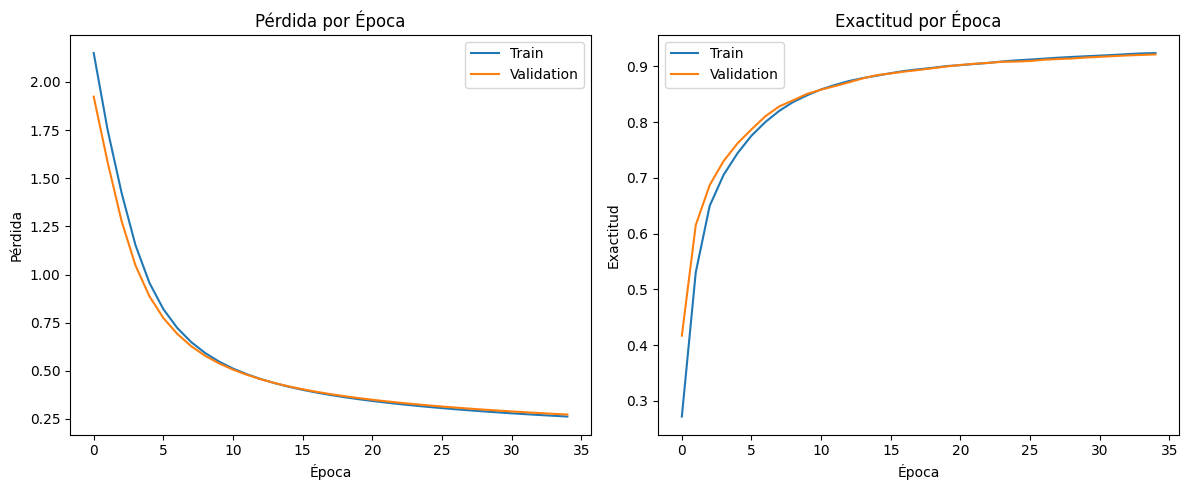


Evaluación en Test:

Exactitud: 0.9244285714285714

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1381
           1       0.95      0.97      0.96      1575
           2       0.94      0.90      0.92      1398
           3       0.91      0.91      0.91      1428
           4       0.95      0.93      0.94      1365
           5       0.92      0.89      0.90      1263
           6       0.93      0.96      0.95      1375
           7       0.92      0.93      0.93      1459
           8       0.88      0.87      0.88      1365
           9       0.89      0.91      0.90      1391

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



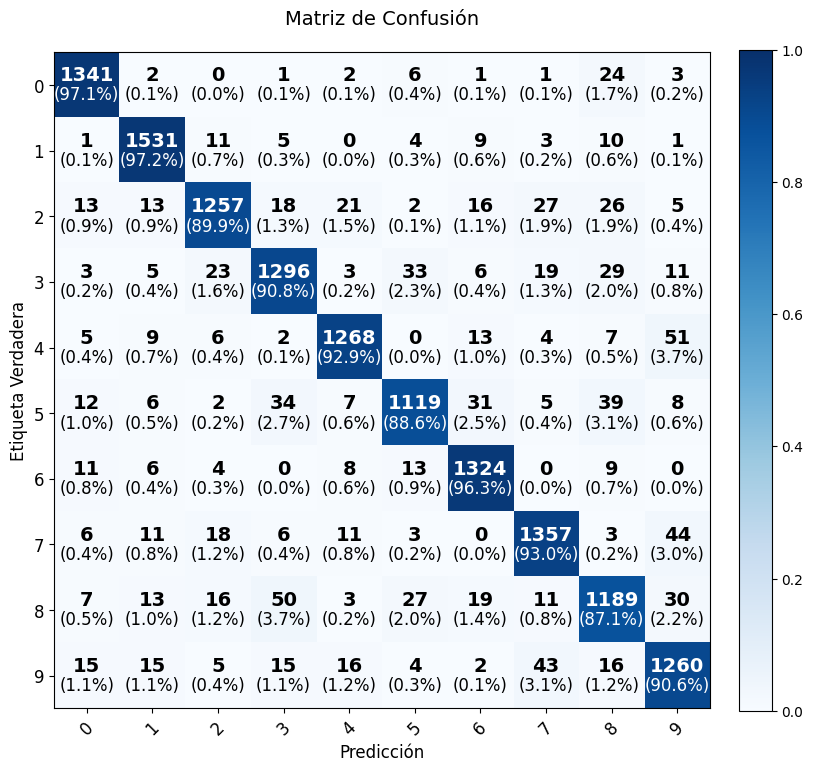

Memoria GPU liberada.


In [ ]:
# 0. Detectar dispositivo y cargar xp = cupy o numpy
try:
    import cupy as cp
    _has_cupy = True
except ImportError:
    cp = None
    _has_cupy = False

import numpy as np  # Para fallback cuando no haya CuPy
from numpy.lib.stride_tricks import sliding_window_view as np_sliding_window_view
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

def get_xp(device):
    """
    Devuelve el módulo xp: cp si device='gpu' y CuPy está disponible,
    en caso contrario NumPy.
    """
    device = device.lower()
    if device == 'gpu' and _has_cupy:
        return cp
    else:
        return np

# 1. Función para graficar matriz de confusión (convierte a NumPy si es CuPy)
def plot_combined_confusion_matrix(cm, classes, title='Matriz de Confusión'):
    """Matriz combinada con valores absolutos y relativos"""
    if _has_cupy and isinstance(cm, cp.ndarray):
        cm_np = cp.asnumpy(cm)
    else:
        cm_np = cm

    cm_norm = cm_np.astype('float') / cm_np.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 8))
    plt.imshow(cm_norm, interpolation='nearest', cmap='Blues', vmin=0, vmax=1)
    plt.title(title, pad=20, fontsize=14)
    plt.colorbar(fraction=0.046, pad=0.04)

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=12)
    plt.yticks(tick_marks, classes, fontsize=12)

    thresh = 0.5
    for i, j in np.ndindex(cm_np.shape):
        plt.text(j, i-0.15, f"{cm_np[i, j]}",
                 ha='center', va='center',
                 color='white' if cm_norm[i, j] > thresh else 'black',
                 fontsize=14, fontweight='bold')
        plt.text(j, i+0.15, f"({cm_norm[i, j]:.1%})",
                 ha='center', va='center',
                 color='white' if cm_norm[i, j] > thresh else 'black',
                 fontsize=12)

    plt.tight_layout()
    plt.ylabel('Etiqueta Verdadera', fontsize=12)
    plt.xlabel('Predicción', fontsize=12)
    plt.show()

# 2. Cargar y preparar datos de MNIST (siempre en CPU, porque sklearn retorna NumPy)
def load_mnist_data(test_size=0.2, val_size=0.1, random_state=42):
    """
    Carga MNIST y divide en train/val/test usando NumPy.
    """
    print("Cargando MNIST...")
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X, y = mnist.data, mnist.target.astype(int)

    # Normalizar y redimensionar
    X = X.reshape(-1, 28, 28, 1).astype('float32') / 255.0

    # Dividir en train+val y test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state)
    # Dividir train en train y val
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=val_size, stratify=y_train, random_state=random_state)

    print(f"Train: {X_train.shape[0]}, Val: {X_val.shape[0]}, Test: {X_test.shape[0]}")
    return X_train, X_val, X_test, y_train, y_val, y_test

# 3. Clases de capas usando im2col / sliding_window_view con xp (NumPy o CuPy)

class Conv2D:
    """
    Capa convolucional 2D usando im2col + matmul (BLAS/cuBLAS) y sliding_window_view.
    xp: numpy o cupy
    """
    def __init__(self, filters, kernel_size, input_shape, xp, stride=1, padding=1, activation='relu'):
        """
        filters: número de filtros (F)
        kernel_size: entero (KH = KW)
        input_shape: tupla (H, W, C) de la entrada esperada
        xp: módulo (np o cp)
        stride: entero (por defecto 1)
        padding: entero (por defecto 1 para 'same')
        activation: 'relu' o None
        """
        self.filters = filters
        self.KH = kernel_size
        self.KW = kernel_size
        self.stride = stride
        self.padding = padding
        self.activation = activation
        self.xp = xp

        # Detectamos y guardamos el número de canales a partir de input_shape
        H_in, W_in, C_in = input_shape
        self.input_shape = (None, H_in, W_in, C_in)

        # Inicialización He: tomamos C directamente
        fan_in = kernel_size * kernel_size * C_in
        rng = xp.random if xp is not np else np.random
        self.W = rng.randn(self.KH, self.KW, C_in, filters, dtype=xp.float32) * xp.sqrt(2.0 / fan_in)
        self.b = xp.zeros(filters, dtype=xp.float32)

    def forward(self, X):
        """
        Forward pass vectorizado con im2col / sliding_window_view.
        X: (N, H, W, C) — numpy.ndarray o cupy.ndarray
        """
        xp = self.xp
        N, H, W_in, C_in = X.shape

        # 1) Padding si es necesario
        if self.padding > 0:
            X_padded = xp.pad(
                X,
                ((0, 0),
                 (self.padding, self.padding),
                 (self.padding, self.padding),
                 (0, 0)),
                mode='constant',
                constant_values=0
            )
        else:
            X_padded = X

        # 2) Calcular dimensiones de salida
        H_padded = H + 2*self.padding
        W_padded = W_in + 2*self.padding
        OH = (H_padded - self.KH) // self.stride + 1
        OW = (W_padded - self.KW) // self.stride + 1
        self.OH, self.OW = OH, OW

        # 3) Extraer parches con sliding_window_view sobre ejes (1,2)
        #    NumPy/CuPy devuelven shape = (N, H_padded-KH+1, W_padded-KW+1, C_in, KH, KW)
        if xp is np:
            patches = np_sliding_window_view(X_padded, (self.KH, self.KW), axis=(1, 2))
        else:
            patches = xp.lib.stride_tricks.sliding_window_view(
                X_padded, (self.KH, self.KW), axis=(1, 2)
            )
        # Tras la llamada anterior, patches.shape = (N, OH, OW, C_in, KH, KW)
        # Hacemos un transpose para pasar a la forma (N, OH, OW, KH, KW, C_in):
        patches = patches.transpose(0, 1, 2, 4, 5, 3)  # → (N, OH, OW, KH, KW, C_in)

        # Ahora aplicamos el stride:
        patches = patches[:, ::self.stride, ::self.stride, :, :, :]  # → (N, OH, OW, KH, KW, C_in)

        # Guardamos parches para backward
        self.X = X
        self.X_padded = X_padded
        self.X_patches = patches  # (N, OH, OW, KH, KW, C_in)

        # 4) Aplanar parches para matmul: (N*OH*OW, KH*KW*C_in)
        Np, OH, OW, KH, KW, Cp = patches.shape
        # Cp == C_in
        X_col = patches.reshape(Np, OH, OW, KH*KW*Cp)      # (N, OH, OW, KH*KW*C_in)
        X_col = X_col.transpose(0, 1, 2, 3).reshape(N*OH*OW, KH*KW*Cp)

        # 5) Aplanar pesos W: (KH, KW, C_in, F) → (KH*KW*C_in, F)
        C_from_W = self.W.shape[2]  # Éste sí coincide con Cp
        W_col = self.W.reshape(self.KH * self.KW * C_from_W, self.filters)

        # 6) Matmul grande + bias  → out_col: (N*OH*OW, F)
        #    NumPy usará BLAS; CuPy usará cuBLAS/cuDNN.
        out_col = X_col.dot(W_col) + self.b.reshape(1, self.filters)

        # 7) Reconstruir salida: (N, OH, OW, F)
        out = out_col.reshape(N, OH, OW, self.filters)

        # 8) Aplicar activación
        if self.activation == 'relu':
            self.out = xp.maximum(0, out)
            return self.out
        else:
            self.out = out
            return out

    def backward(self, dZ, lr):
        """
        Retropropagación usando operaciones vectorizadas + scatter.
        dZ: (N, OH, OW, F)
        lr: learning rate (float)
        """
        xp = self.xp
        N, H, W_in, C_in = self.X.shape
        KH, KW = self.KH, self.KW
        stride, padding = self.stride, self.padding
        OH, OW = self.OH, self.OW

        # 1) Si hay ReLU, enmascarar gradiente
        if self.activation == 'relu':
            dZ = dZ * (self.out > 0)

        # 2) Convertir dZ a dZ_col: (N*OH*OW, F)
        dZ_col = dZ.reshape(N * OH * OW, self.filters)

        # 3) Reconstruir X_col: (N*OH*OW, KH*KW*C_in) usando los parches guardados
        patches = self.X_patches  # (N, OH, OW, KH, KW, C_in)
        _, _, _, KH2, KW2, Cp2 = patches.shape  # Cp2 == C_in
        X_col = patches.reshape(N, OH, OW, KH2 * KW2 * Cp2).transpose(0, 1, 2, 3)
        X_col = X_col.reshape(N * OH * OW, KH2 * KW2 * Cp2)

        # 4) Gradientes de pesos y bias
        #    dW_col: (KH*KW*C_in, F) = X_col^T @ dZ_col
        dW_col = X_col.T.dot(dZ_col)
        dW = dW_col.reshape(KH2, KW2, Cp2, self.filters)
        db = xp.sum(dZ_col, axis=0)

        # 5) Gradiente w.r.t. X_col: dX_col = dZ_col @ W_col^T  → (N*OH*OW, KH*KW*C_in)
        C_from_W = self.W.shape[2]  # debe coincidir con Cp2
        W_col = self.W.reshape(KH * KW * C_from_W, self.filters)  # (KH*KW*C_in, F)
        dX_col = dZ_col.dot(W_col.T)  # (N*OH*OW, KH*KW*C_in)
        dX_patches = dX_col.reshape(N, OH, OW, KH, KW, C_from_W)

        # 6) Scatter dX_patches en dX_padded vía bucles sobre (KH, KW)
        dX_padded = xp.zeros_like(self.X_padded)  # (N, H_padded, W_padded, C_in)
        for p in range(KH):
            for q in range(KW):
                patch_grad = dX_patches[:, :, :, p, q, :]  # (N, OH, OW, C_in)
                dX_padded[:, p:p + stride*OH:stride, q:q + stride*OW:stride, :] += patch_grad

        # 7) Si hubo padding, recortar para obtener dX en forma (N, H, W, C_in)
        if padding > 0:
            dX = dX_padded[:, padding:-padding, padding:-padding, :]
        else:
            dX = dX_padded

        # 8) Actualizar pesos y bias
        self.W -= lr * dW
        self.b -= lr * db

        return dX


class MaxPool2D:
    """
    Capa de Max Pooling 2D vectorizado usando sliding_window_view.
    xp: numpy o cupy
    """
    def __init__(self, pool_size=2, xp=np):
        """
        pool_size: int (altura y ancho del bloque de pooling, stride = pool_size)
        xp: módulo (np o cp)
        """
        self.pool_size = pool_size
        self.xp = xp

    def forward(self, X):
        """
        Forward de MaxPool2D sin bucles anidados sobre posiciones.
        X: (N, H, W, C)
        Devuelve out: (N, H//ps, W//ps, C)
        """
        xp = self.xp
        N, H, W, C = X.shape
        PS = self.pool_size
        OH = H // PS
        OW = W // PS

        # 1) Extraer parches con sliding_window_view sobre ejes (1,2)
        #    Forma intermedia: (N, H-PS+1, W-PS+1, C, PS, PS)
        if xp is np:
            patches = np_sliding_window_view(X, (PS, PS), axis=(1, 2))
        else:
            patches = xp.lib.stride_tricks.sliding_window_view(
                X, (PS, PS), axis=(1, 2)
            )
        # patches.shape = (N, H-PS+1, W-PS+1, C, PS, PS)
        # Transponemos a (N, H-PS+1, W-PS+1, PS, PS, C)
        patches = patches.transpose(0, 1, 2, 4, 5, 3)
        # Ahora aplicamos stride = PS
        patches = patches[:, ::PS, ::PS, :, :, :]  # → (N, OH, OW, PS, PS, C)

        # 2) Calcular máximos y máscara
        Np, OH2, OW2, p1, p2, Cp = patches.shape
        patches_flat = patches.reshape(Np, OH2, OW2, p1*p2, Cp)  # (N, OH, OW, PS*PS, C)
        max_vals = xp.max(patches_flat, axis=3)                # (N, OH, OW, C)
        mask = (patches_flat == max_vals[:, :, :, None, :])    # (N, OH, OW, PS*PS, C)

        # 3) Guardar para backward
        self.X_shape = X.shape
        self.mask = mask       # (N, OH, OW, PS*PS, C)
        self.max_vals = max_vals
        self.pool_size = PS

        # 4) Devolver salida
        return max_vals  # (N, OH, OW, C)

    def backward(self, dout):
        """
        Retropropagación de MaxPool2D vectorizado.
        dout: (N, OH, OW, C)
        Devuelve dX: (N, H, W, C)
        """
        xp = self.xp
        N, H, W, C = self.X_shape
        PS = self.pool_size
        OH = H // PS
        OW = W // PS

        # 1) Expandir dout para cada posición de PS*PS: (N, OH, OW, 1, 1, C)
        dout_expanded = dout[:, :, :, None, None, :]  # (N, OH, OW, 1, 1, C)

        # 2) mask: (N, OH, OW, PS*PS, C) → reordenar a (N, OH, OW, PS, PS, C)
        mask = self.mask.reshape(N, OH, OW, PS, PS, C)  # (N, OH, OW, PS, PS, C)

        # 3) Generar dX_patches: (N, OH, OW, PS, PS, C) = mask * dout_expanded
        dX_patches = mask * dout_expanded  # broadcast sobre ejes 3 y 4

        # 4) Scatter dX_patches en dX: (N, H, W, C)
        dX = xp.zeros((N, H, W, C), dtype=dout.dtype)
        for p in range(PS):
            for q in range(PS):
                dX[:, p:H:PS, q:W:PS, :] += dX_patches[:, :, :, p, q, :]

        return dX


class Flatten:
    """Capa Flatten"""
    def forward(self, X):
        self.input_shape = X.shape
        return X.reshape(X.shape[0], -1)

    def backward(self, dZ):
        return dZ.reshape(self.input_shape)


class Dense:
    """Capa fully connected (Dense) con xp"""
    def __init__(self, units, input_dim, xp, activation='relu'):
        self.units = units
        self.activation = activation
        self.xp = xp
        rng = xp.random if xp is not np else np.random
        # Inicialización He en xp
        self.W = rng.randn(input_dim, units, dtype=xp.float32) * xp.sqrt(2.0 / input_dim)
        self.b = xp.zeros(units, dtype=xp.float32)

    def forward(self, X):
        xp = self.xp
        self.X = X  # (batch, input_dim)
        self.Z = xp.dot(X, self.W) + self.b  # (batch, units)

        if self.activation == 'relu':
            return xp.maximum(0, self.Z)
        elif self.activation == 'softmax':
            exp = xp.exp(self.Z - xp.max(self.Z, axis=1, keepdims=True))
            return exp / xp.sum(exp, axis=1, keepdims=True)
        else:
            return self.Z

    def backward(self, dA, lr):
        xp = self.xp
        batch_size = self.X.shape[0]

        if self.activation == 'relu':
            dZ = dA * (self.Z > 0)
        else:
            dZ = dA  # para softmax + crossentropy, dA ya es dZ

        dW = xp.dot(self.X.T, dZ) / batch_size
        db = xp.sum(dZ, axis=0) / batch_size
        dX = xp.dot(dZ, self.W.T)

        # Actualizar parámetros
        self.W -= lr * dW
        self.b -= lr * db

        return dX


# 4. Modelo CNN completo usando estas capas
class CNN:
    def __init__(self, xp):
        """
        Arquitectura: Conv -> Pool -> Conv -> Pool -> Flatten -> Dense -> Output
        xp: numpy o cupy
        """
        self.xp = xp
        # Input: (28, 28, 1)
        self.conv1 = Conv2D(filters=32, kernel_size=3, input_shape=(28, 28, 1),
                            xp=xp, stride=1, padding=1, activation='relu')
        self.pool1 = MaxPool2D(pool_size=2, xp=xp)
        # Después de pool1: (14, 14, 32)
        self.conv2 = Conv2D(filters=64, kernel_size=3, input_shape=(14, 14, 32),
                            xp=xp, stride=1, padding=1, activation='relu')
        self.pool2 = MaxPool2D(pool_size=2, xp=xp)
        # Después de pool2: (7, 7, 64)
        self.flatten = Flatten()
        self.dense = Dense(units=128, input_dim=7*7*64, xp=xp, activation='relu')
        self.output = Dense(units=10, input_dim=128, xp=xp, activation='softmax')

    def forward(self, X):
        xp = self.xp
        X = self.conv1.forward(X)   # (N, 28, 28, 32)
        X = self.pool1.forward(X)   # (N, 14, 14, 32)
        X = self.conv2.forward(X)   # (N, 14, 14, 64)
        X = self.pool2.forward(X)   # (N, 7, 7, 64)
        X = self.flatten.forward(X) # (N, 7*7*64)
        X = self.dense.forward(X)   # (N, 128)
        return self.output.forward(X)  # (N, 10)

    def backward(self, dZ, lr):
        # dZ aquí es gradiente de la pérdida w.r.t. salidas softmax
        dZ = self.output.backward(dZ, lr)  # (N, 128)
        dZ = self.dense.backward(dZ, lr)   # (N, 7*7*64)
        dZ = self.flatten.backward(dZ)     # (N, 7, 7, 64)
        dZ = self.pool2.backward(dZ)       # (N, 14, 14, 64)
        dZ = self.conv2.backward(dZ, lr)   # (N, 14, 14, 32)
        dZ = self.pool1.backward(dZ)       # (N, 28, 28, 32)
        dZ = self.conv1.backward(dZ, lr)   # (N, 28, 28, 1)
        # No devolvemos nada; se actualizan parámetros en cada capa

    def compute_loss(self, y_true, y_pred):
        """
        Cross-entropy loss.
        y_true: one‐hot (N, 10)
        y_pred: (N, 10)
        """
        xp = self.xp
        eps = 1e-15
        y_pred_clip = xp.clip(y_pred, eps, 1.0 - eps)
        return -xp.mean(xp.sum(y_true * xp.log(y_pred_clip), axis=1))

    def train(self, X_train, y_train, X_val, y_val, epochs=10, batch_size=32, lr=0.001):
        xp = self.xp
        # One‐hot encoding en xp
        y_train_oh = xp.eye(10, dtype=xp.float32)[y_train]
        y_val_oh = xp.eye(10, dtype=xp.float32)[y_val]

        history = {'loss': [], 'val_loss': [], 'acc': [], 'val_acc': []}
        epoch_pbar = tqdm(range(epochs), desc='Entrenando', unit='epoch', position=0)

        for epoch in epoch_pbar:
            epoch_loss = 0.0
            epoch_acc = 0.0
            num_batches = (len(X_train) + batch_size - 1) // batch_size

            batch_pbar = tqdm(range(0, len(X_train), batch_size),
                              desc=f'Época {epoch+1}/{epochs}',
                              unit='batch', position=1, leave=False, total=num_batches)

            for i in batch_pbar:
                X_batch = X_train[i:i+batch_size]    # NumPy array
                y_batch = y_train_oh[i:i+batch_size] # NumPy array, one‐hot

                # Mover a GPU si xp == cp
                if xp is cp:
                    Xb = cp.asarray(X_batch)
                    yb = cp.asarray(y_batch)
                else:
                    Xb = X_batch
                    yb = y_batch

                # Forward
                y_pred = self.forward(Xb)  # (batch, 10)
                loss = self.compute_loss(yb, y_pred)

                # Gradiente de cross‐entropy con softmax
                dZ = (y_pred - yb) / Xb.shape[0]

                # Backward
                self.backward(dZ, lr)

                # Calcular accuracy de batch (pasar a NumPy para sklearn)
                if xp is cp:
                    y_pred_np = cp.asnumpy(y_pred)
                    yb_np = cp.asnumpy(yb)
                else:
                    y_pred_np = y_pred
                    yb_np = yb

                batch_acc = accuracy_score(
                    np.argmax(yb_np, axis=1),
                    np.argmax(y_pred_np, axis=1)
                )
                epoch_loss += float(loss) * Xb.shape[0]
                epoch_acc += batch_acc * Xb.shape[0]

                batch_pbar.set_postfix({
                    'loss': f'{float(loss):.4f}',
                    'acc': f'{batch_acc:.4f}'
                })

            batch_pbar.close()

            # Validación
            if xp is cp:
                Xv = cp.asarray(X_val)
                yv = cp.asarray(y_val_oh)
                val_pred = self.forward(Xv)
                val_pred_np = cp.asnumpy(val_pred)
                y_val_oh_np = cp.asnumpy(y_val_oh)
            else:
                val_pred = self.forward(X_val)
                val_pred_np = val_pred
                y_val_oh_np = y_val_oh

            # Calcular val_loss
            if xp is cp:
                val_loss = self.compute_loss(yv, val_pred)
                val_loss = float(cp.asnumpy(val_loss))
            else:
                val_loss = float(self.compute_loss(y_val_oh, val_pred))

            val_acc = accuracy_score(y_val, np.argmax(val_pred_np, axis=1))

            avg_loss = epoch_loss / len(X_train)
            avg_acc = epoch_acc / len(X_train)

            history['loss'].append(avg_loss)
            history['acc'].append(avg_acc)
            history['val_loss'].append(val_loss)
            history['val_acc'].append(val_acc)

            epoch_pbar.set_postfix({
                'loss': f'{avg_loss:.4f}',
                'acc': f'{avg_acc:.4f}',
                'val_loss': f'{val_loss:.4f}',
                'val_acc': f'{val_acc:.4f}'
            })

        return history

    def evaluate(self, X, y, batch_size_eval=256):
        """
        Evalúa en modo GPU/CPU usando batches pequeños para no quedarnos OOM.
        X: numpy.ndarray con todas las imágenes de test (shape: [N, 28, 28, 1])
        y: numpy.ndarray con etiquetas (shape: [N])
        batch_size_eval: cuántas imágenes procesar en GPU a la vez
        """
        xp = self.xp

        all_preds = []   # aquí iremos guardando los predichos de cada batch

        N = X.shape[0]
        for i in range(0, N, batch_size_eval):
            X_batch = X[i : i + batch_size_eval]
            # Convertimos esa porción a GPU (si xp=cp) o la dejamos como está (si xp=np)
            if xp is cp:
                Xb = cp.asarray(X_batch)
            else:
                Xb = X_batch

            # Forward en ese batch
            y_pred_batch = self.forward(Xb)  # (batch_size_eval, 10)

            # Extraemos las etiquetas predichas (argmax) y pasamos a NumPy
            if xp is cp:
                y_pred_cpu = cp.asnumpy(xp.argmax(y_pred_batch, axis=1))
            else:
                y_pred_cpu = np.argmax(y_pred_batch, axis=1)

            all_preds.append(y_pred_cpu)

            # Opcionalmente: liberar memoria pool de CuPy
            if xp is cp:
                cp.get_default_memory_pool().free_all_blocks()

        # Concatenamos todas las predicciones
        y_pred_labels = np.concatenate(all_preds, axis=0)  # forma (N,)

        # Ahora podemos calcular métricas en CPU
        print("\nExactitud:", accuracy_score(y, y_pred_labels))
        print("\nReporte de Clasificación:")
        print(classification_report(y, y_pred_labels))

        cm = confusion_matrix(y, y_pred_labels)
        plot_combined_confusion_matrix(cm, classes=[str(i) for i in range(10)])


# 5. Función main adaptada
def main(device='gpu'):
    """
    device: 'gpu' o 'cpu'. Si pides 'gpu' pero no hay CuPy, cae a 'cpu'.
    """
    xp = get_xp(device)
    if device == 'gpu' and xp is np:
        print("No se detectó CuPy/GPU; se usará CPU (NumPy).")
    elif xp is cp:
        print("Usando GPU (CuPy) para operaciones numéricas.")
    else:
        print("Usando CPU (NumPy) para operaciones numéricas.")

    # 1. Cargar datos (siempre en CPU)
    X_train, X_val, X_test, y_train, y_val, y_test = load_mnist_data()

    # 2. Crear y entrenar modelo
    model = CNN(xp=xp)
    history = model.train(
        X_train, y_train,
        X_val, y_val,
        epochs=35,
        batch_size=64,
        lr=0.001
    )

    # 3. Graficar curvas de pérdida y accuracy (convertir a NumPy si xp es CuPy)
    loss_train = np.array(history['loss'])
    loss_val = np.array(history['val_loss'])
    acc_train = np.array(history['acc'])
    acc_val = np.array(history['val_acc'])

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(loss_train, label='Train')
    plt.plot(loss_val, label='Validation')
    plt.title('Pérdida por Época')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(acc_train, label='Train')
    plt.plot(acc_val, label='Validation')
    plt.title('Exactitud por Época')
    plt.xlabel('Época')
    plt.ylabel('Exactitud')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # 4. Evaluación en test
    print("\nEvaluación en Test:")
    model.evaluate(X_test, y_test)

    # 5. Limpiar para liberar GPU
    if xp is cp:
        # 5.1. Eliminar referencias a objetos grandes
        del model
        del X_train, X_val, X_test, y_train, y_val, y_test
        del history, loss_train, loss_val, acc_train, acc_val

        # 5.2. Forzar recolección de basura de Python
        import gc
        gc.collect()

        # 5.3. Liberar los memory pools de CuPy
        cp.get_default_memory_pool().free_all_blocks()
        cp.get_default_pinned_memory_pool().free_all_blocks()

        print("Memoria GPU liberada.")


if __name__ == "__main__":
    main(device='gpu')

# Red Neuronal Convolucional para Clasificación de MNIST con apoyo para GPU y visualización de características

El siguiente ejemplo añade más complejidad, se visualiza qué podría estar aprendiendo la red neuronal. Estudie el código y ejecútelo.

Usando GPU (CuPy) para operaciones numéricas.
Cargando MNIST...
Train: 50400, Val: 5600, Test: 14000

Entrenando CNN...


Entrenando:   0%|          | 0/35 [00:00<?, ?epoch/s]


Evaluación en Test:

Exactitud: 0.9312857142857143

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1381
           1       0.96      0.97      0.97      1575
           2       0.94      0.89      0.92      1398
           3       0.91      0.91      0.91      1428
           4       0.96      0.93      0.95      1365
           5       0.92      0.90      0.91      1263
           6       0.94      0.97      0.95      1375
           7       0.94      0.94      0.94      1459
           8       0.89      0.90      0.90      1365
           9       0.89      0.91      0.90      1391

    accuracy                           0.93     14000
   macro avg       0.93      0.93      0.93     14000
weighted avg       0.93      0.93      0.93     14000



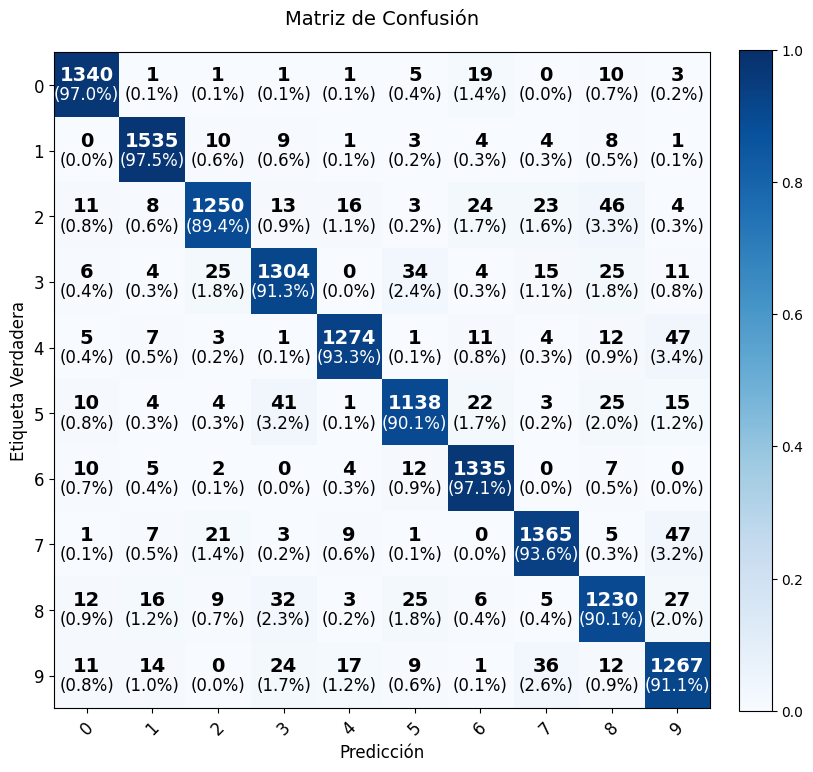


1. VISUALIZACIÓN DE FILTROS APRENDIDOS


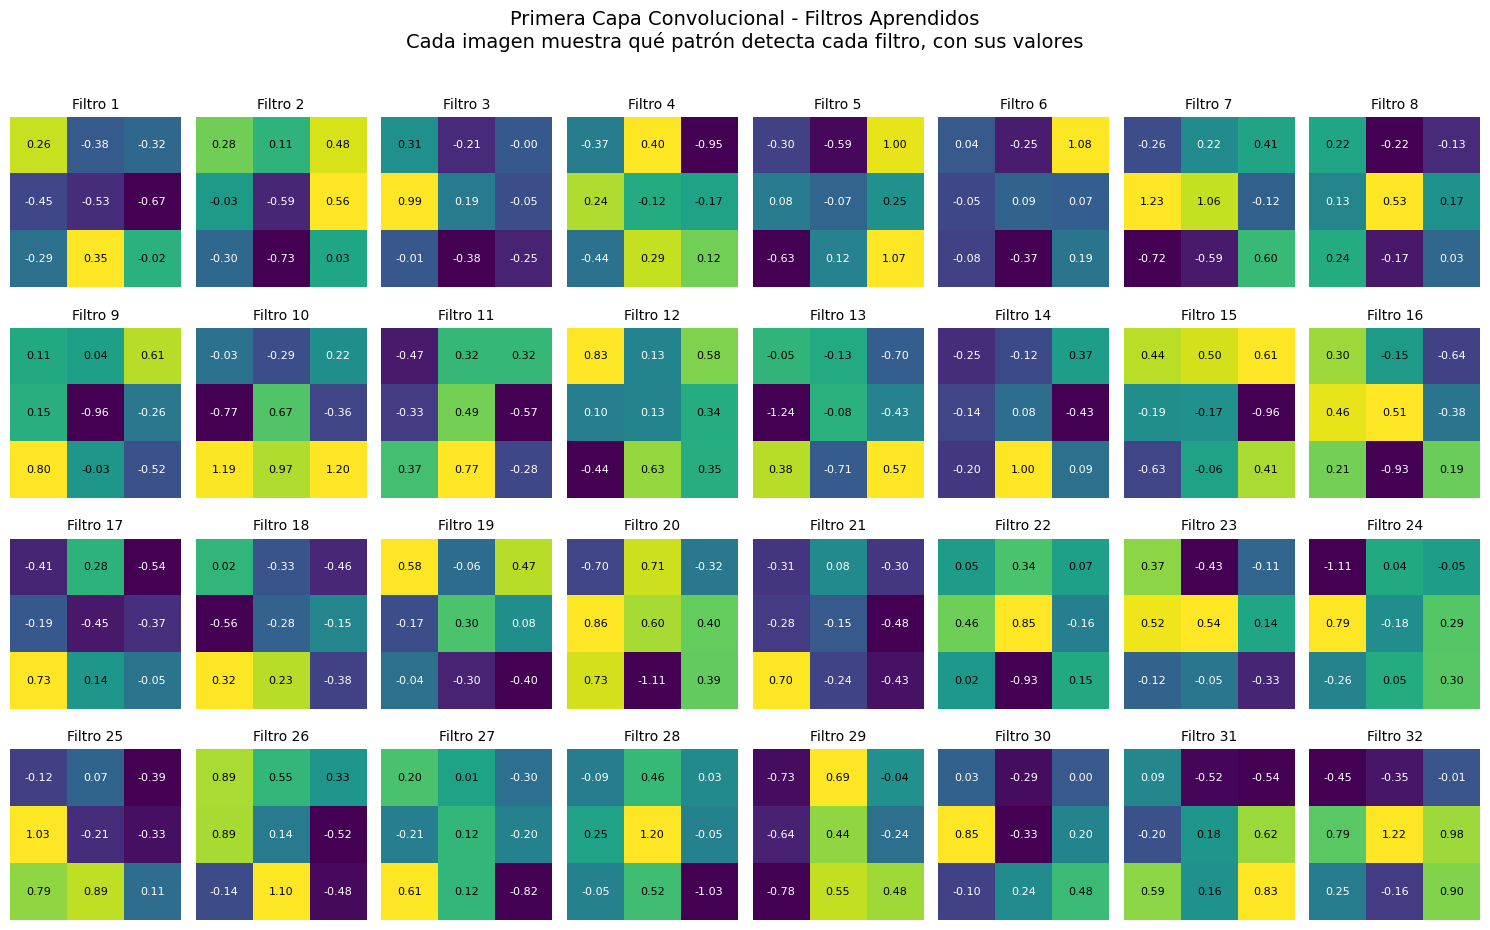


Interpretación de Primera Capa Convolucional:
• Cada filtro (3×3) detecta patrones básicos: bordes horizontales, verticales o pequeñas esquinas.
• Los valores positivos (hacia amarillo) realzan las zonas donde ese patrón aparece en la imagen.
• Los valores negativos (hacia morado) atenúan zonas donde el patrón no encaja.


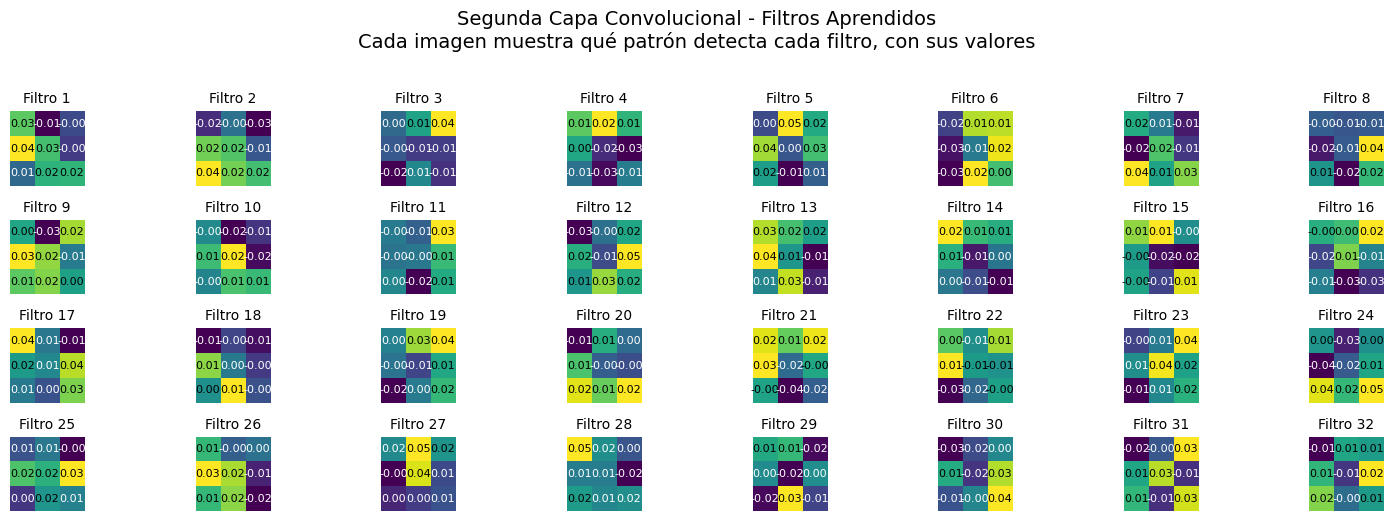


Interpretación de Segunda Capa Convolucional:
• En la segunda capa, cada filtro combina la salida de Conv1 (32 canales) para formas más complejas.
• Al promediar sobre los canales de entrada ves el “peso global” que cada filtro otorga en posición (i,j).
• Filas con valores positivos fuertes indican que ese parche responde fuertemente a combinaciones de bordes obtenidos en Conv1.

2. VISUALIZACIÓN DE MAPAS DE CARACTERÍSTICAS

--- Muestra 1 ---


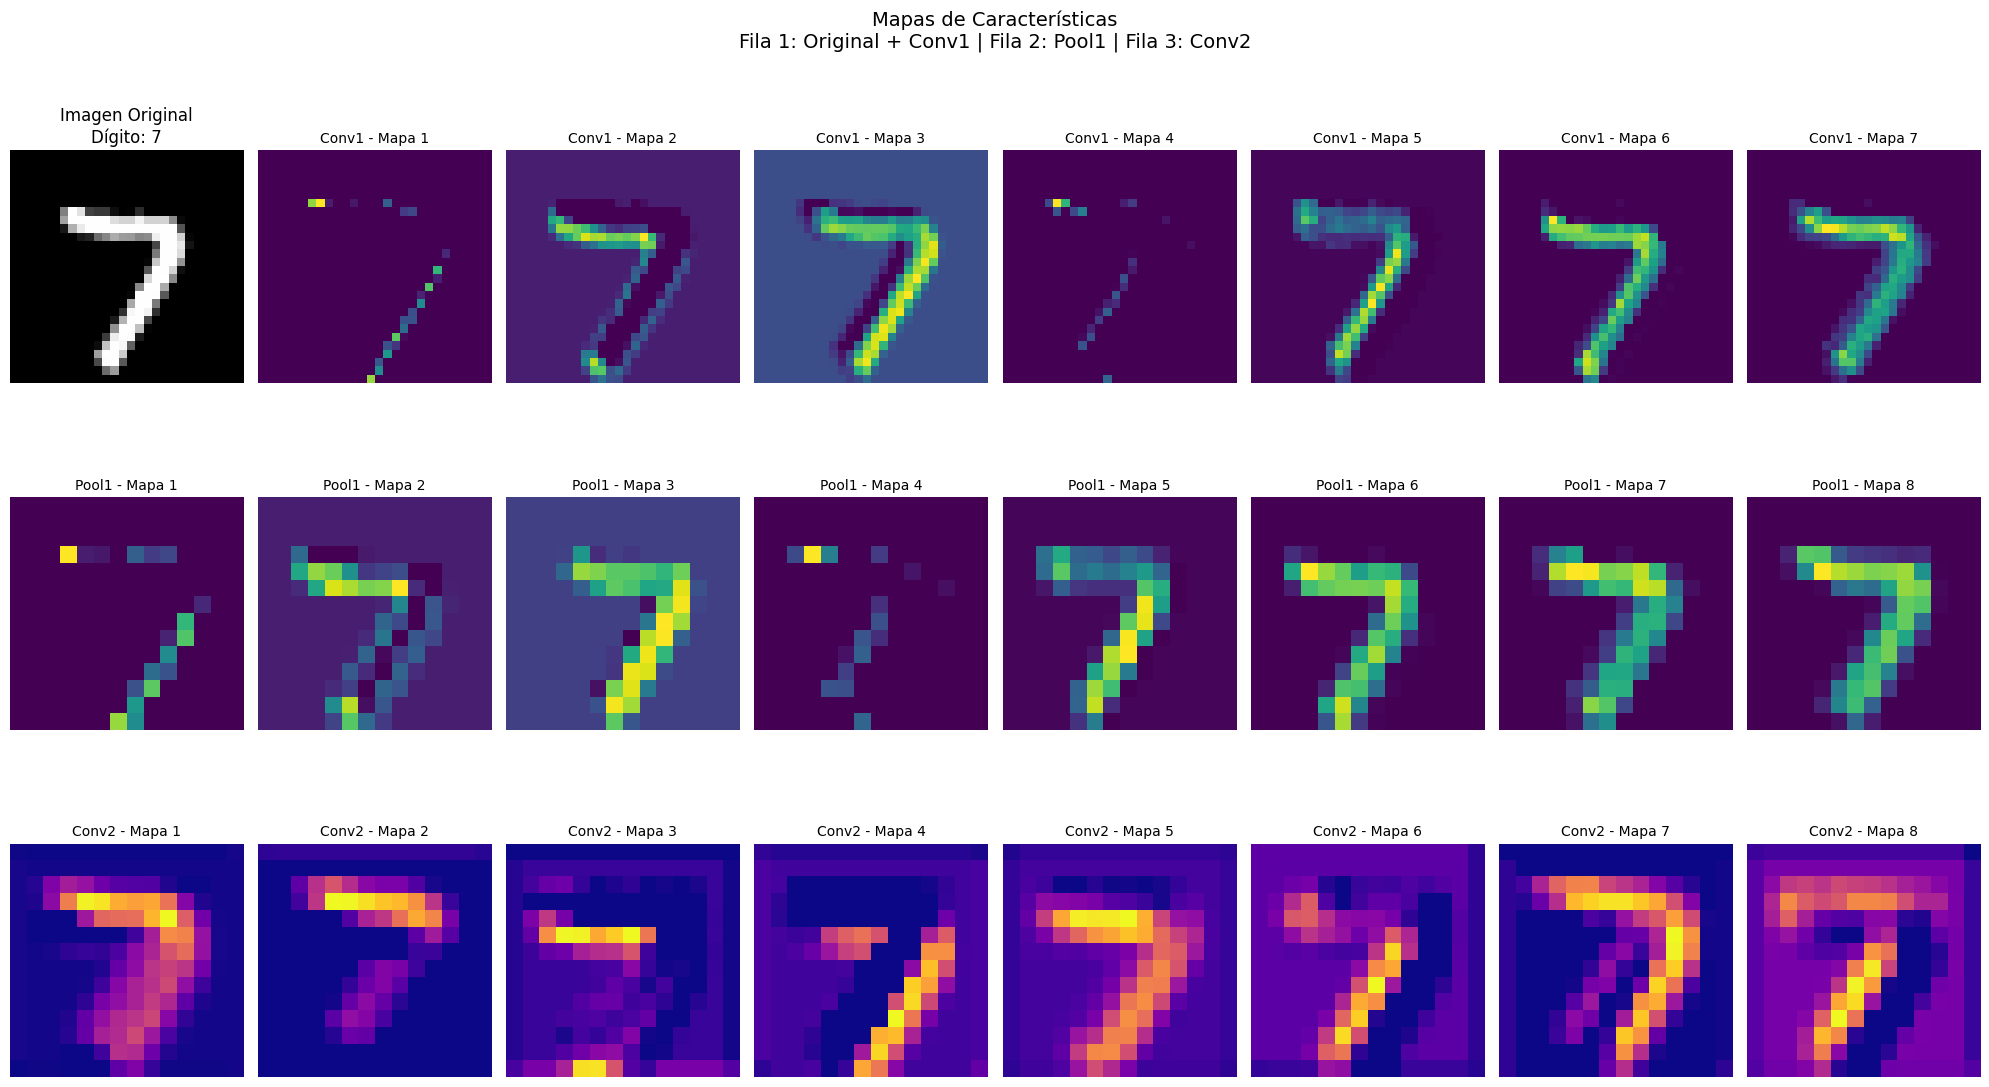


Interpretación de los Mapas de Características:
• CONV1: Detecta bordes y patrones básicos (líneas horizontales, verticales, etc.).
• POOL1: Reduce resolución manteniendo las activaciones más fuertes.
• CONV2: Combina características de CONV1 para formar patrones más complejos.

--- Muestra 2 ---


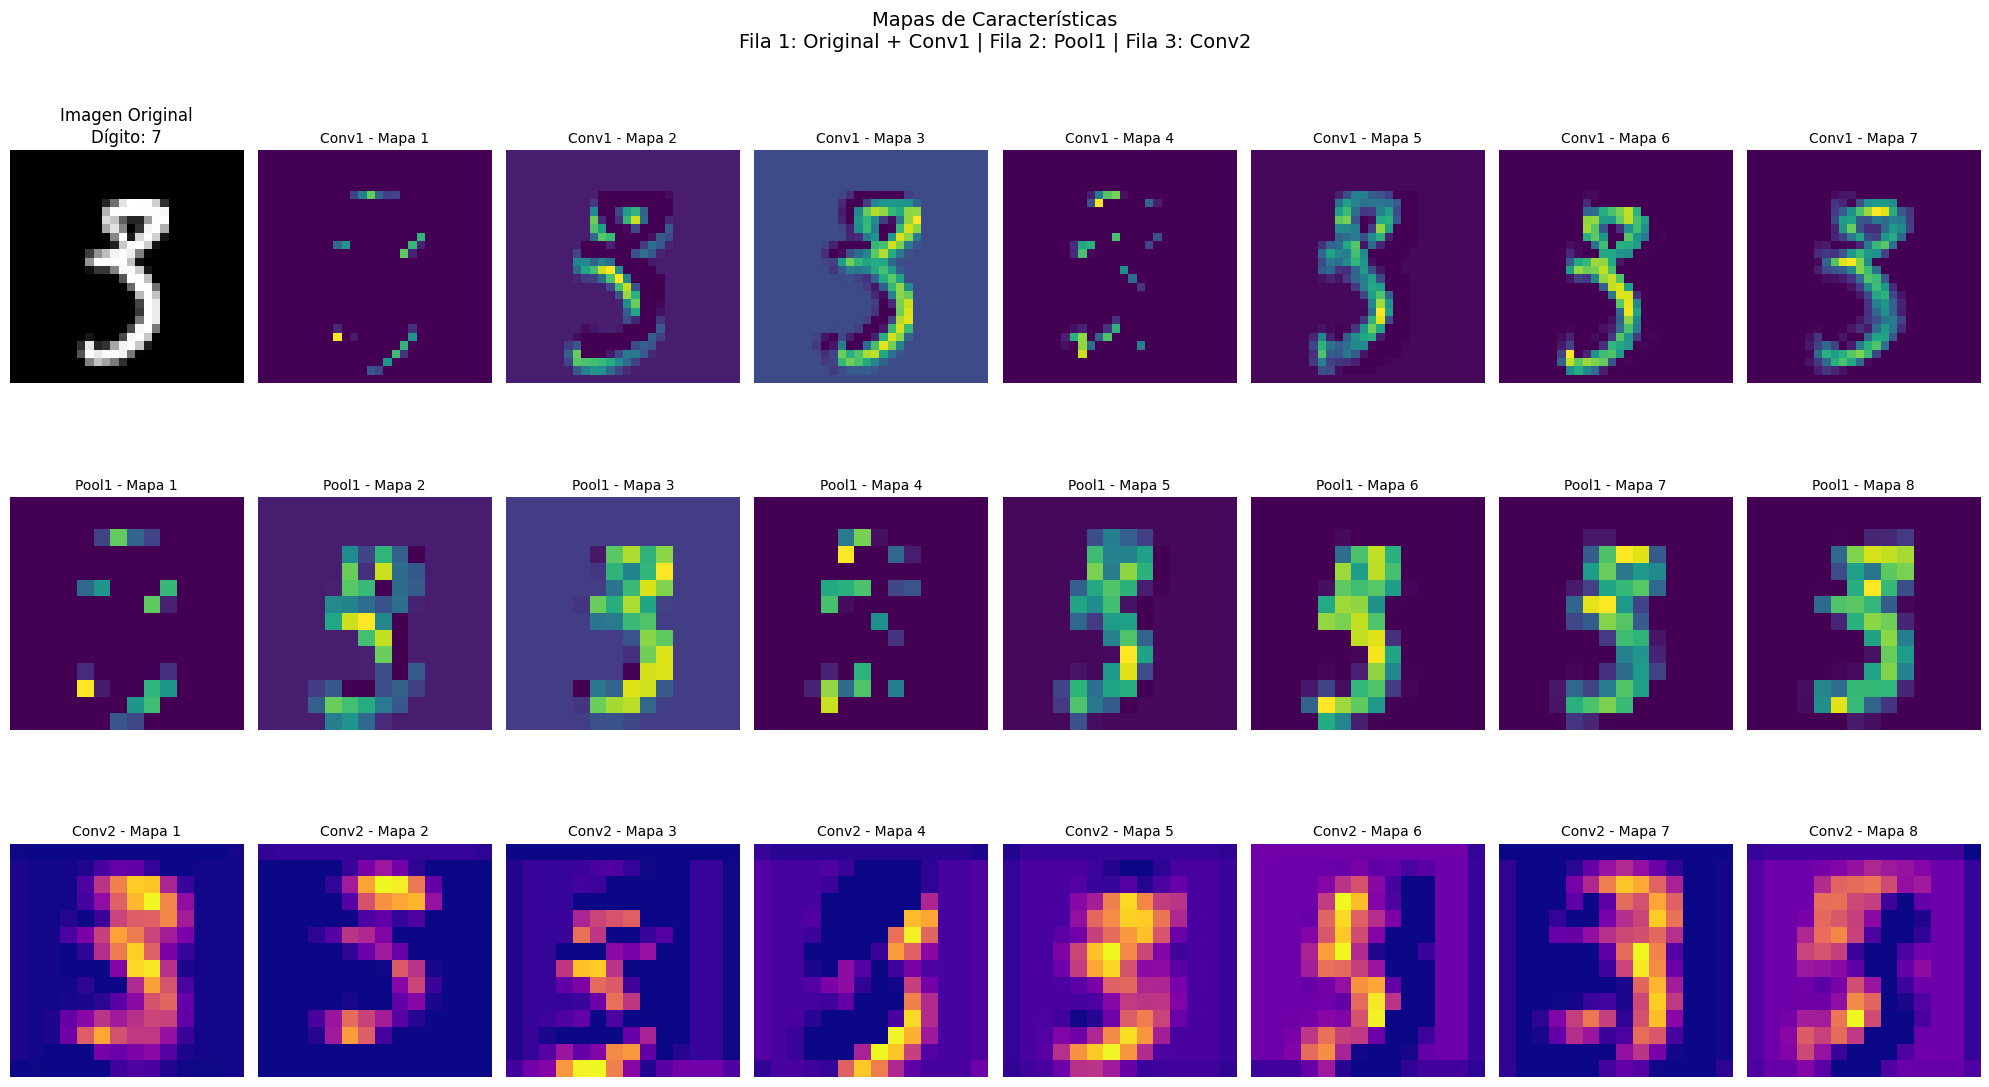


Interpretación de los Mapas de Características:
• CONV1: Detecta bordes y patrones básicos (líneas horizontales, verticales, etc.).
• POOL1: Reduce resolución manteniendo las activaciones más fuertes.
• CONV2: Combina características de CONV1 para formar patrones más complejos.

--- Muestra 3 ---


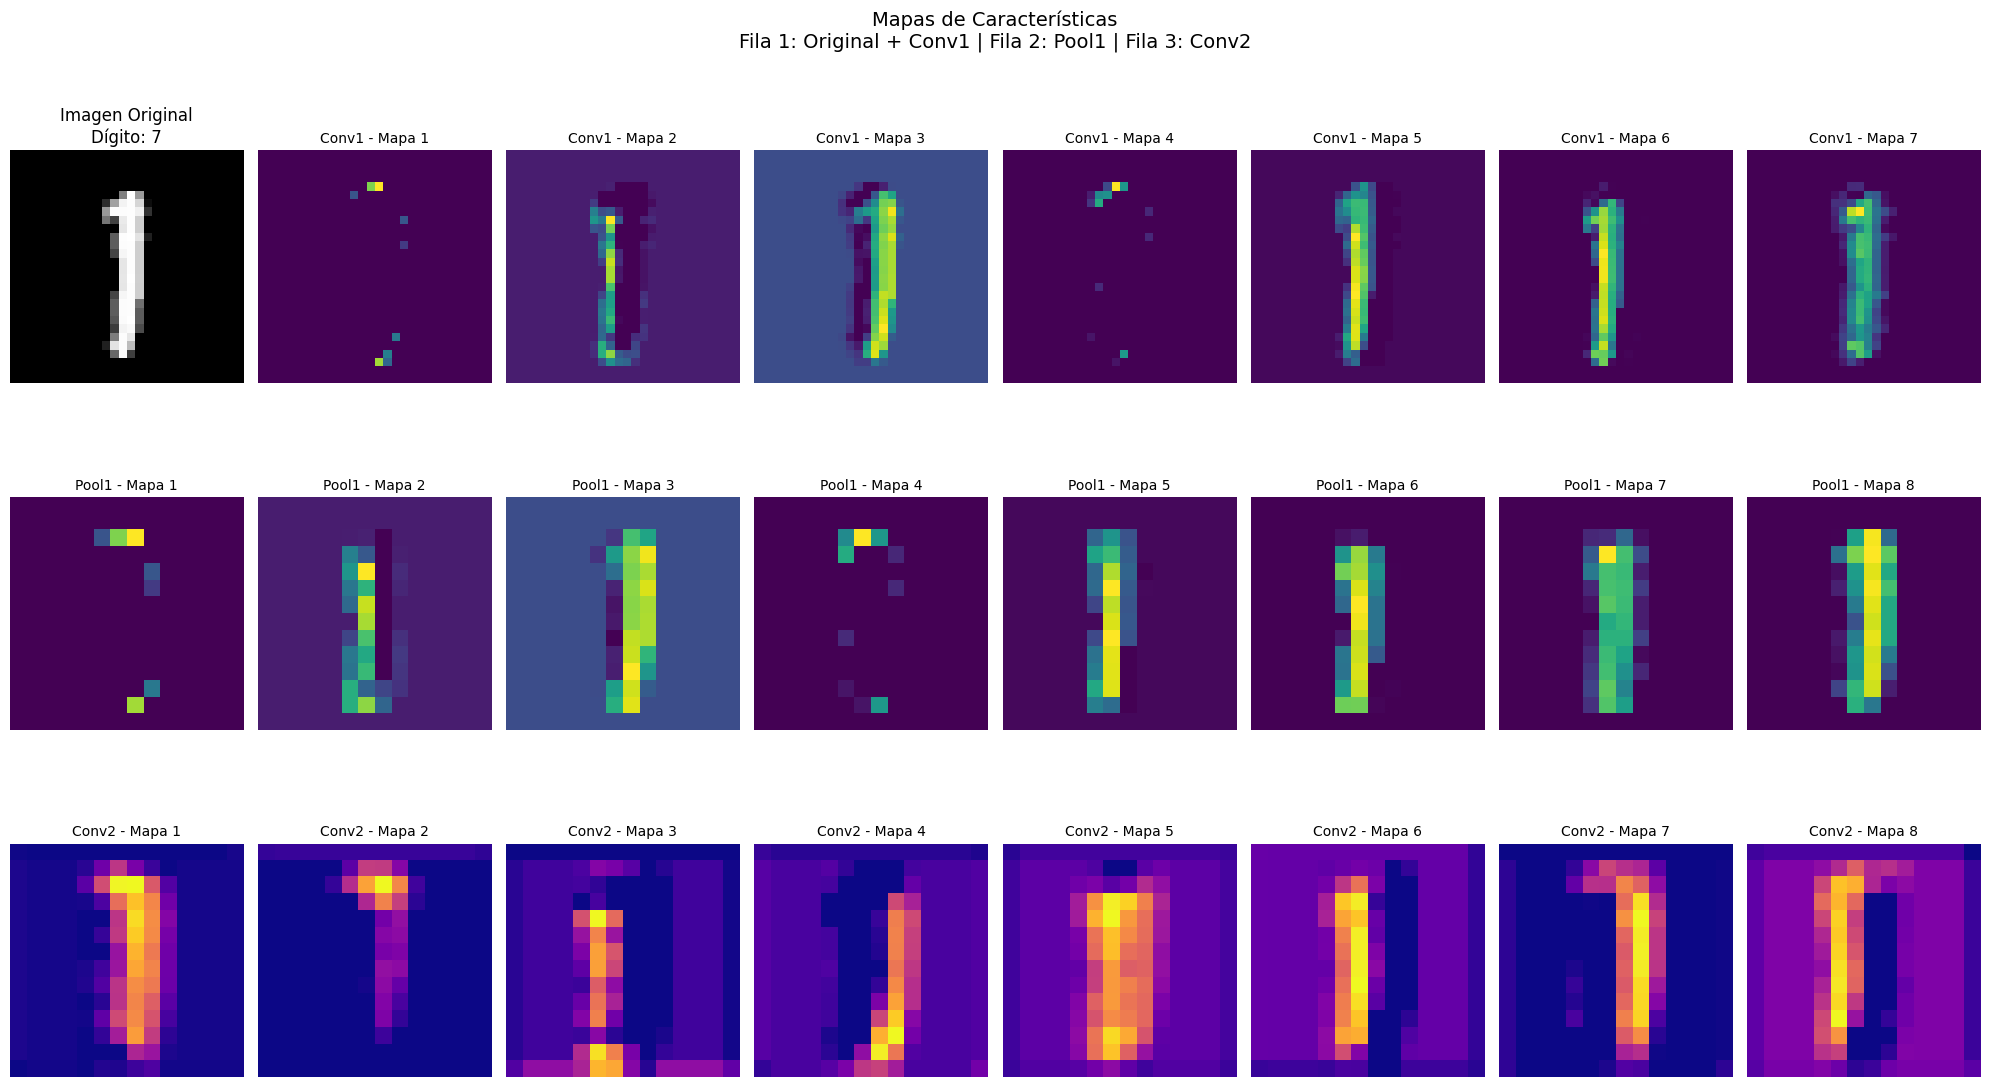


Interpretación de los Mapas de Características:
• CONV1: Detecta bordes y patrones básicos (líneas horizontales, verticales, etc.).
• POOL1: Reduce resolución manteniendo las activaciones más fuertes.
• CONV2: Combina características de CONV1 para formar patrones más complejos.

3. ANÁLISIS DE RESPUESTAS DE CAPAS
Analizando respuestas de las capas a diferentes dígitos...

Conv1:
   • Dimensiones de salida: (28, 28, 32)
   • Número de filtros: 32
   • Rango de activación: [0.000, 3.953]
   • Escasez (% neuronas activas): 55.0%

Conv2:
   • Dimensiones de salida: (14, 14, 64)
   • Número de filtros: 64
   • Rango de activación: [0.000, 14.989]
   • Escasez (% neuronas activas): 69.9%



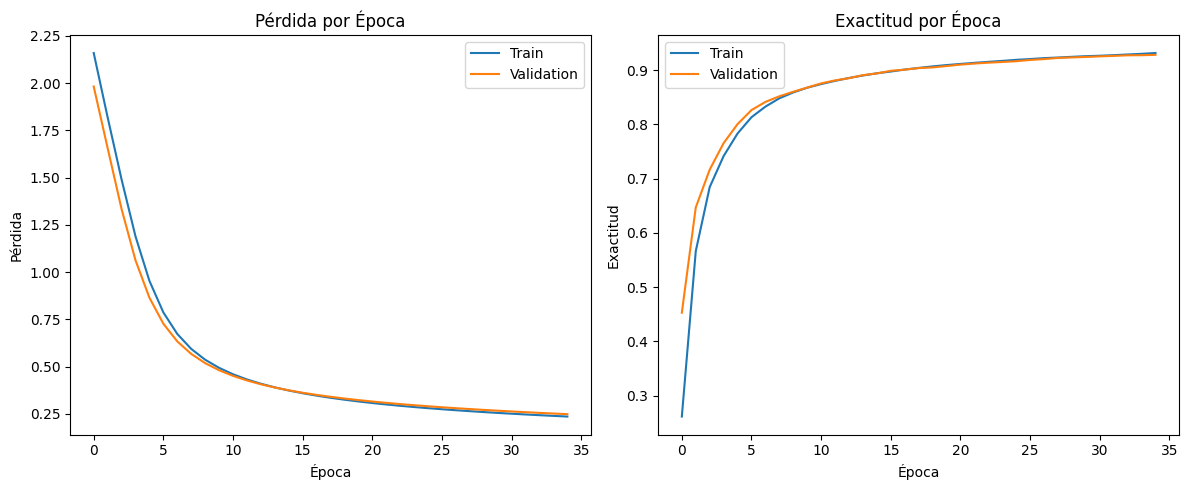

Memoria GPU liberada.


In [ ]:
# 0. Detectar dispositivo y cargar xp = cupy o numpy
try:
    import cupy as cp
    _has_cupy = True
except ImportError:
    cp = None
    _has_cupy = False

import numpy as np  # Para fallback cuando no haya CuPy
from numpy.lib.stride_tricks import sliding_window_view as np_sliding_window_view
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

def get_xp(device):
    """
    Devuelve el módulo xp: cp si device='gpu' y CuPy está disponible,
    en caso contrario NumPy.
    """
    device = device.lower()
    if device == 'gpu' and _has_cupy:
        return cp
    else:
        return np

def to_cpu(x, xp):
    """
    Si xp es CuPy, convierte x a NumPy; si xp es NumPy, lo devuelve igual.
    """
    if xp is cp:
        return cp.asnumpy(x)
    else:
        return x

# 1. Función para graficar matriz de confusión (convierte a NumPy si es CuPy)
def plot_combined_confusion_matrix(cm, classes, title='Matriz de Confusión'):
    """Matriz combinada con valores absolutos y relativos"""
    if _has_cupy and isinstance(cm, cp.ndarray):
        cm_np = cp.asnumpy(cm)
    else:
        cm_np = cm

    cm_norm = cm_np.astype('float') / cm_np.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 8))
    plt.imshow(cm_norm, interpolation='nearest', cmap='Blues', vmin=0, vmax=1)
    plt.title(title, pad=20, fontsize=14)
    plt.colorbar(fraction=0.046, pad=0.04)

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=12)
    plt.yticks(tick_marks, classes, fontsize=12)

    thresh = 0.5
    for i, j in np.ndindex(cm_np.shape):
        plt.text(j, i-0.15, f"{cm_np[i, j]}",
                 ha='center', va='center',
                 color='white' if cm_norm[i, j] > thresh else 'black',
                 fontsize=14, fontweight='bold')
        plt.text(j, i+0.15, f"({cm_norm[i, j]:.1%})",
                 ha='center', va='center',
                 color='white' if cm_norm[i, j] > thresh else 'black',
                 fontsize=12)

    plt.tight_layout()
    plt.ylabel('Etiqueta Verdadera', fontsize=12)
    plt.xlabel('Predicción', fontsize=12)
    plt.show()

# 2. Cargar y preparar datos de MNIST (siempre en CPU, porque sklearn retorna NumPy)
def load_mnist_data(test_size=0.2, val_size=0.1, random_state=42, xp=np):
    """
    Carga MNIST y divide en train/val/test usando NumPy (o convierte a xp si es CuPy).
    """
    print("Cargando MNIST...")
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X, y = mnist.data, mnist.target.astype(int)

    # Normalizar y redimensionar
    X = X.reshape(-1, 28, 28, 1).astype('float32') / 255.0

    # Dividir en train+val y test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state)
    # Dividir train en train y val
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=val_size, stratify=y_train, random_state=random_state)

    # Si xp es CuPy, convertimos
    if xp is not np:
        X_train = xp.asarray(X_train)
        X_val   = xp.asarray(X_val)
        X_test  = xp.asarray(X_test)
        y_train = xp.asarray(y_train)
        y_val   = xp.asarray(y_val)
        y_test  = xp.asarray(y_test)

    print(f"Train: {X_train.shape[0]}, Val: {X_val.shape[0]}, Test: {X_test.shape[0]}")
    return X_train, X_val, X_test, y_train, y_val, y_test

# 3. Clases de capas usando im2col / sliding_window_view con xp (NumPy o CuPy),
#    pero extendidas para almacenar la última salida (feature maps).
class Conv2D:
    """
    Capa convolucional 2D usando im2col + matmul (BLAS/cuBLAS) y sliding_window_view.
    xp: numpy o cupy. Además guarda last_output para poder visualizar feature maps.
    """
    def __init__(self, filters, kernel_size, input_shape, xp, stride=1, padding=1, activation='relu', name="conv"):
        """
        filters: número de filtros (F)
        kernel_size: entero (KH = KW)
        input_shape: tupla (H, W, C) de la entrada esperada (solo para inicialización)
        xp: módulo (np o cp)
        stride: entero (por defecto 1)
        padding: entero (por defecto 1 para 'same')
        activation: 'relu' o None
        name: nombre de la capa (solo para identificación al visualizar)
        """
        self.filters = filters
        self.KH = kernel_size
        self.KW = kernel_size
        self.stride = stride
        self.padding = padding
        self.activation = activation
        self.xp = xp
        self.name = name

        # Inicializamos pesos con He, a partir de input_shape[-1]
        H_in, W_in, C_in = input_shape
        fan_in = kernel_size * kernel_size * C_in
        rng = xp.random if xp is not np else np.random
        self.W = rng.randn(self.KH, self.KW, C_in, filters, dtype=xp.float32) * xp.sqrt(2.0 / fan_in)
        self.b = xp.zeros(filters, dtype=xp.float32)

        # Para almacenar última salida y última entrada (si quieres usarla)
        self.last_output = None
        self.last_input = None

    def forward(self, X):
        """
        Forward pass vectorizado con im2col / sliding_window_view.
        X: (N, H, W, C) — numpy.ndarray o cupy.ndarray
        Devuelve: (N, OH, OW, filters)
        """
        xp = self.xp
        N, H, W_in, C_in = X.shape
        self.last_input = X  # Guardamos la entrada para poder ver cómo reacciona.

        # 1) Padding si es necesario
        if self.padding > 0:
            X_padded = xp.pad(
                X,
                ((0, 0),
                 (self.padding, self.padding),
                 (self.padding, self.padding),
                 (0, 0)),
                mode='constant',
                constant_values=0
            )
        else:
            X_padded = X

        # 2) Calcular dimensiones de salida
        H_padded = H + 2*self.padding
        W_padded = W_in + 2*self.padding
        OH = (H_padded - self.KH) // self.stride + 1
        OW = (W_padded - self.KW) // self.stride + 1
        self.OH, self.OW = OH, OW

        # 3) Extraer parches con sliding_window_view sobre ejes (1,2)
        #    NumPy/CuPy devuelven shape = (N, H_padded-KH+1, W_padded-KW+1, C_in, KH, KW)
        if xp is np:
            patches = np_sliding_window_view(X_padded, (self.KH, self.KW), axis=(1, 2))
        else:
            patches = xp.lib.stride_tricks.sliding_window_view(
                X_padded, (self.KH, self.KW), axis=(1, 2)
            )
        # Ahora: patches.shape = (N, OH+stride_offset, OW+stride_offset, C_in, KH, KW).
        # Queremos pasar a (N, OH, OW, KH, KW, C_in), así que transponemos:
        patches = patches.transpose(0, 1, 2, 4, 5, 3)  # → (N, OH, OW, KH, KW, C_in)

        # Aplicamos el stride recortando según stride:
        patches = patches[:, ::self.stride, ::self.stride, :, :, :]  # → (N, OH, OW, KH, KW, C_in)

        # Guardamos los parches para backward (no para visualizar, pero para retroprop).
        self.X_padded = X_padded
        self.X_patches = patches  # (N, OH, OW, KH, KW, C_in)

        # 4) Aplanar parches para matmul: (N*OH*OW, KH*KW*C_in)
        Np, OH, OW, KH, KW, Cp = patches.shape
        X_col = patches.reshape(Np, OH, OW, KH*KW*Cp)      # (N, OH, OW, KH*KW*C_in)
        X_col = X_col.transpose(0, 1, 2, 3).reshape(N*OH*OW, KH*KW*Cp)

        # 5) Aplanar pesos W: (KH, KW, C_in, F) → (KH*KW*C_in, F)
        C_from_W = self.W.shape[2]  # este debe coincidir con Cp
        W_col = self.W.reshape(self.KH * self.KW * C_from_W, self.filters)

        # 6) Matmul grande + bias  → out_col: (N*OH*OW, F)
        out_col = X_col.dot(W_col) + self.b.reshape(1, self.filters)

        # 7) Reconstruir salida: (N, OH, OW, filters)
        out = out_col.reshape(N, OH, OW, self.filters)

        # 8) Aplicar activación
        if self.activation == 'relu':
            self.out = xp.maximum(0, out)
        else:
            self.out = out

        # Guardamos esta salida como “feature maps” para visualizar después
        self.last_output = self.out
        return self.out

    def backward(self, dZ, lr):
        """
        Retropropagación usando operaciones vectorizadas + scatter.
        dZ: (N, OH, OW, F)
        lr: learning rate (float)
        """
        xp = self.xp
        N, H, W_in, C_in = self.last_input.shape
        KH, KW = self.KH, self.KW
        stride, padding = self.stride, self.padding
        OH, OW = self.OH, self.OW

        # 1) Si hay ReLU, enmascarar gradiente
        if self.activation == 'relu':
            dZ = dZ * (self.last_output > 0)

        # 2) Convertir dZ a dZ_col: (N*OH*OW, F)
        dZ_col = dZ.reshape(N * OH * OW, self.filters)

        # 3) Reconstruir X_col: (N*OH*OW, KH*KW*C_in) usando los parches guardados
        patches = self.X_patches  # (N, OH, OW, KH, KW, C_in)
        _, _, _, KH2, KW2, Cp2 = patches.shape  # Cp2 == C_in
        X_col = patches.reshape(N, OH, OW, KH2 * KW2 * Cp2).transpose(0, 1, 2, 3)
        X_col = X_col.reshape(N * OH * OW, KH2 * KW2 * Cp2)

        # 4) Gradientes de pesos y bias
        dW_col = X_col.T.dot(dZ_col)  # (KH*KW*C_in, F)
        dW = dW_col.reshape(KH2, KW2, Cp2, self.filters)
        db = xp.sum(dZ_col, axis=0)

        # 5) Gradiente w.r.t. X_col: dX_col = dZ_col @ W_col^T  → (N*OH*OW, KH*KW*C_in)
        C_from_W = self.W.shape[2]
        W_col = self.W.reshape(KH * KW * C_from_W, self.filters)  # (KH*KW*C_in, F)
        dX_col = dZ_col.dot(W_col.T)  # → (N*OH*OW, KH*KW*C_in)
        dX_patches = dX_col.reshape(N, OH, OW, KH, KW, C_from_W)

        # 6) Scatter dX_patches en dX_padded vía 2 bucles sobre (KH, KW)
        dX_padded = xp.zeros_like(self.X_padded)  # (N, H_padded, W_padded, C_in)
        for p in range(KH):
            for q in range(KW):
                patch_grad = dX_patches[:, :, :, p, q, :]  # (N, OH, OW, C_in)
                dX_padded[:, p:p + stride*OH:stride, q:q + stride*OW:stride, :] += patch_grad

        # 7) Si hubo padding, recortar para obtener dX en forma (N, H, W, C_in)
        if padding > 0:
            dX = dX_padded[:, padding:-padding, padding:-padding, :]
        else:
            dX = dX_padded

        # 8) Actualizar pesos y bias
        self.W -= lr * dW
        self.b -= lr * db

        return dX

    def get_filters(self):
        """Retorna los filtros aprendidos (CPU numpy array) para visualización."""
        return to_cpu(self.W, self.xp)

    def get_feature_maps(self, sample_idx=0):
        """
        Retorna los mapas de características (feature maps) de la última pasada
        para la muestra sample_idx. Entrega un NumPy array.
        Forma: (OH, OW, filters)
        """
        if self.last_output is None:
            return None
        fmap = self.last_output[sample_idx]  # (OH, OW, filters) en xp
        return to_cpu(fmap, self.xp)

class MaxPool2D:
    """
    Capa de Max Pooling 2D vectorizado usando sliding_window_view.
    xp: numpy o cupy
    """
    def __init__(self, pool_size=2, xp=np, name="pool"):
        """
        pool_size: int (altura y ancho del bloque de pooling, stride = pool_size)
        xp: módulo (np o cp)
        name: nombre de la capa (solo para identificación)
        """
        self.pool_size = pool_size
        self.xp = xp
        self.name = name

        # Para visualizar feature maps después del pool
        self.last_output = None
        self.mask = None

    def forward(self, X):
        """
        Forward de MaxPool2D sin bucles anidados sobre posiciones (en ejes H,W).
        X: (N, H, W, C)
        Devuelve out: (N, H//ps, W//ps, C) y guarda last_output
        """
        xp = self.xp
        N, H, W, C = X.shape
        PS = self.pool_size
        OH = H // PS
        OW = W // PS

        # 1) Extraer parches con sliding_window_view sobre ejes (1,2)
        #    → (N, H-PS+1, W-PS+1, C, PS, PS)
        if xp is np:
            patches = np_sliding_window_view(X, (PS, PS), axis=(1, 2))
        else:
            patches = xp.lib.stride_tricks.sliding_window_view(
                X, (PS, PS), axis=(1, 2)
            )
        # patches.shape = (N, H-PS+1, W-PS+1, C, PS, PS)
        # Transponemos a (N, H-PS+1, W-PS+1, PS, PS, C)
        patches = patches.transpose(0, 1, 2, 4, 5, 3)
        # Aplicamos stride = PS
        patches = patches[:, ::PS, ::PS, :, :, :]  # → (N, OH, OW, PS, PS, C)

        # 2) Calcular máximos y máscara
        Np, OH2, OW2, p1, p2, Cp = patches.shape
        patches_flat = patches.reshape(Np, OH2, OW2, p1*p2, Cp)  # (N, OH, OW, PS*PS, C)
        max_vals = xp.max(patches_flat, axis=3)                # (N, OH, OW, C)
        mask = (patches_flat == max_vals[:, :, :, None, :])    # (N, OH, OW, PS*PS, C)

        # 3) Guardar para backward
        self.last_output = max_vals
        self.mask = mask
        self.X_shape = X.shape

        # 4) Devolver salida
        return max_vals  # (N, OH, OW, C)

    def backward(self, dZ):
        """
        Retropropagación de MaxPool2D vectorizado.
        dZ: (N, OH, OW, C)
        Devuelve dX: (N, H, W, C)
        """
        xp = self.xp
        N, H, W, C = self.X_shape
        PS = self.pool_size
        OH = H // PS
        OW = W // PS

        # 1) Expandir dout para cada posición de PS*PS: (N, OH, OW, 1, 1, C)
        dout_expanded = dZ[:, :, :, None, None, :]  # (N, OH, OW, 1, 1, C)

        # 2) mask: (N, OH, OW, PS*PS, C) → (N, OH, OW, PS, PS, C)
        mask = self.mask.reshape(N, OH, OW, PS, PS, C)

        # 3) Generar dX_patches: (N, OH, OW, PS, PS, C) = mask * dout_expanded
        dX_patches = mask * dout_expanded  # broadcast sobre ejes 3 y 4

        # 4) Scatter dX_patches en dX: (N, H, W, C)
        dX = xp.zeros((N, H, W, C), dtype=dZ.dtype)
        for p in range(PS):
            for q in range(PS):
                dX[:, p:H:PS, q:W:PS, :] += dX_patches[:, :, :, p, q, :]

        return dX

class Flatten:
    """Capa Flatten"""
    def __init__(self, xp=np, name="flatten"):
        self.xp = xp
        self.name = name

    def forward(self, X):
        self.input_shape = X.shape
        return X.reshape(X.shape[0], -1)

    def backward(self, dZ):
        return dZ.reshape(self.input_shape)

class Dense:
    """Capa Fully Connected"""
    def __init__(self, units, input_dim, xp=np, activation='relu', name="dense"):
        self.units = units
        self.activation = activation
        self.xp = xp
        self.name = name
        rng = xp.random if xp is not np else np.random
        self.W = rng.randn(input_dim, units, dtype=xp.float32) * xp.sqrt(2./input_dim)
        self.b = xp.zeros(units, dtype=xp.float32)

    def forward(self, X):
        self.X = X  # (batch, input_dim)
        xp = self.xp
        self.Z = xp.dot(X, self.W) + self.b  # (batch, units)

        if self.activation == 'relu':
            return xp.maximum(0, self.Z)
        elif self.activation == 'softmax':
            exp = xp.exp(self.Z - xp.max(self.Z, axis=1, keepdims=True))
            return exp / xp.sum(exp, axis=1, keepdims=True)
        else:
            return self.Z

    def backward(self, dA, lr):
        xp = self.xp
        batch_size = self.X.shape[0]

        if self.activation == 'relu':
            dZ = dA * (self.Z > 0)
        else:
            dZ = dA  # para softmax + crossentropy, dA ya es dZ

        dW = xp.dot(self.X.T, dZ) / batch_size
        db = xp.sum(dZ, axis=0) / batch_size
        dX = xp.dot(dZ, self.W.T)

        # Actualizar parámetros
        self.W -= lr * dW
        self.b -= lr * db

        return dX

# 4. Modelo CNN con capacidades de visualización
class VisualizableCNN:
    def __init__(self, xp=np):
        """
        Arquitectura: Conv -> Pool -> Conv -> Pool -> Flatten -> Dense -> Output,
        con nombres y capacidad de visualización.
        """
        self.xp = xp
        # Input: (28, 28, 1)
        self.conv1 = Conv2D(filters=32, kernel_size=3, input_shape=(28, 28, 1),
                            xp=xp, stride=1, padding=1, activation='relu', name="conv1")
        self.pool1 = MaxPool2D(pool_size=2, xp=xp, name="pool1")
        # Después de pool1: (14, 14, 32)
        self.conv2 = Conv2D(filters=64, kernel_size=3, input_shape=(14, 14, 32),
                            xp=xp, stride=1, padding=1, activation='relu', name="conv2")
        self.pool2 = MaxPool2D(pool_size=2, xp=xp, name="pool2")
        # Después de pool2: (7, 7, 64)
        self.flatten = Flatten(xp=xp, name="flatten")
        self.dense = Dense(units=128, input_dim=7*7*64, xp=xp, activation='relu', name="dense")
        self.output = Dense(units=10, input_dim=128, xp=xp, activation='softmax', name="output")

        # Para iterar fácilmente sobre las capas convolucionales:
        self.conv_layers = [self.conv1, self.conv2]

    def forward(self, X):
        xp = self.xp
        X = self.conv1.forward(X)
        X = self.pool1.forward(X)
        X = self.conv2.forward(X)
        X = self.pool2.forward(X)
        X = self.flatten.forward(X)
        X = self.dense.forward(X)
        return self.output.forward(X)

    def backward(self, dZ, lr):
        # dZ aquí es gradiente de la pérdida w.r.t. salidas softmax
        dZ = self.output.backward(dZ, lr)
        dZ = self.dense.backward(dZ, lr)
        dZ = self.flatten.backward(dZ)
        dZ = self.pool2.backward(dZ)
        dZ = self.conv2.backward(dZ, lr)
        dZ = self.pool1.backward(dZ)
        dZ = self.conv1.backward(dZ, lr)

    def compute_loss(self, y_true, y_pred):
        """
        Cross-entropy loss.
        y_true: one‐hot (N, 10)
        y_pred: (N, 10)
        """
        xp = self.xp
        eps = 1e-15
        y_pred_clip = xp.clip(y_pred, eps, 1.0 - eps)
        return -xp.mean(xp.sum(y_true * xp.log(y_pred_clip), axis=1))

    def train(self, X_train, y_train, X_val, y_val, epochs=10, batch_size=32, lr=0.001):
        """
        Entrenamiento de la red. Retorna un diccionario con historia de loss/accuracy.
        """
        xp = self.xp

        # One‐hot encoding en xp
        if xp is np:
            y_train_oh = np.eye(10, dtype=np.float32)[to_cpu(y_train, xp)]
            y_val_oh   = np.eye(10, dtype=np.float32)[to_cpu(y_val, xp)]
        else:
            y_train_cpu = to_cpu(y_train, xp)
            y_val_cpu   = to_cpu(y_val, xp)
            y_train_oh = xp.asarray(np.eye(10, dtype=np.float32)[y_train_cpu])
            y_val_oh   = xp.asarray(np.eye(10, dtype=np.float32)[y_val_cpu])

        history = {'loss': [], 'val_loss': [], 'acc': [], 'val_acc': []}

        for epoch in tqdm(range(epochs), desc='Entrenando', unit='epoch'):
            epoch_loss = 0.0
            epoch_acc = 0.0

            # Shuffle manual si quieres:
            # idx = xp.random.permutation(len(X_train)); X_train = X_train[idx]; y_train_oh = y_train_oh[idx]

            for i in range(0, len(X_train), batch_size):
                X_batch = X_train[i:i+batch_size]
                y_batch = y_train_oh[i:i+batch_size]

                # Forward
                y_pred = self.forward(X_batch)
                loss = self.compute_loss(y_batch, y_pred)

                # Gradiente de cross‐entropy con softmax
                dZ = (y_pred - y_batch) / X_batch.shape[0]

                # Backward
                self.backward(dZ, lr)

                # Calcular accuracy de batch (si xp es CuPy, convertimos a CPU para sklearn)
                if xp is cp:
                    y_pred_cpu = to_cpu(xp.argmax(y_pred, axis=1), xp)
                    y_batch_cpu = to_cpu(xp.argmax(y_batch, axis=1), xp)
                else:
                    y_pred_cpu = np.argmax(y_pred, axis=1)
                    y_batch_cpu = np.argmax(y_batch, axis=1)

                batch_acc = accuracy_score(y_batch_cpu, y_pred_cpu)
                epoch_loss += float(to_cpu(loss, xp)) * X_batch.shape[0]
                epoch_acc += batch_acc * X_batch.shape[0]

            # Validación
            val_pred = self.forward(X_val)
            val_loss = self.compute_loss(y_val_oh, val_pred)

            if xp is cp:
                val_pred_cpu = to_cpu(xp.argmax(val_pred, axis=1), xp)
                y_val_cpu = to_cpu(y_val, xp)
                val_acc = accuracy_score(y_val_cpu, val_pred_cpu)
            else:
                val_pred_cpu = np.argmax(val_pred, axis=1)
                val_acc = accuracy_score(y_val, val_pred_cpu)

            history['loss'].append(epoch_loss / len(X_train))
            history['acc'].append(epoch_acc / len(X_train))
            history['val_loss'].append(float(to_cpu(val_loss, xp)))
            history['val_acc'].append(val_acc)

        return history

    def evaluate(self, X, y, batch_size_eval=256):
        """
        Evalúa en modo GPU/CPU usando batches pequeños para no quedarnos OOM.
        X: numpy.ndarray con todas las imágenes de test (shape: [N, 28, 28, 1])
        y: numpy.ndarray con etiquetas (shape: [N])
        batch_size_eval: cuántas imágenes procesar en GPU a la vez
        """
        xp = self.xp

        all_preds = []   # aquí iremos guardando los predichos de cada batch

        N = X.shape[0]
        for i in range(0, N, batch_size_eval):
            X_batch = X[i : i + batch_size_eval]
            # Convertimos esa porción a GPU (si xp=cp) o la dejamos como está (si xp=np)
            if xp is cp:
                Xb = cp.asarray(X_batch)
            else:
                Xb = X_batch

            # Forward en ese batch
            y_pred_batch = self.forward(Xb)  # (batch_size_eval, 10)

            # Extraemos las etiquetas predichas (argmax) y pasamos a NumPy
            if xp is cp:
                y_pred_cpu = cp.asnumpy(xp.argmax(y_pred_batch, axis=1))
            else:
                y_pred_cpu = np.argmax(y_pred_batch, axis=1)

            all_preds.append(y_pred_cpu)

            # Opcionalmente: liberar memoria pool de CuPy
            if xp is cp:
                cp.get_default_memory_pool().free_all_blocks()

        # Concatenamos todas las predicciones
        y_pred_labels = np.concatenate(all_preds, axis=0)  # forma (N,)

        # Ahora podemos calcular métricas en CPU
        print("\nExactitud:", accuracy_score(y, y_pred_labels))
        print("\nReporte de Clasificación:")
        print(classification_report(y, y_pred_labels))

        cm = confusion_matrix(y, y_pred_labels)
        plot_combined_confusion_matrix(cm, classes=[str(i) for i in range(10)])

    def visualize_filters(self, layer_name="conv1", figsize=(15, 10)):
        """
        Visualiza los filtros aprendidos de una capa convolucional,
        mostrando también el valor numérico de cada celda.
        Args:
            layer_name: "conv1" o "conv2"
            figsize: tamaño de la figura
        """
        if layer_name == "conv1":
            # Obtiene los filtros de la primera capa (KH, KW, 1, out_c)
            filters = self.conv1.get_filters()
            layer_title = "Primera Capa Convolucional"
        elif layer_name == "conv2":
            # Obtiene los filtros de la segunda capa (KH, KW, in_c, out_c)
            filters = self.conv2.get_filters()
            layer_title = "Segunda Capa Convolucional"
        else:
            print("Capa no encontrada. Use 'conv1' o 'conv2'")
            return

        # filters.shape = (k_h, k_w, in_c, out_c)
        k_h, k_w, in_c, out_c = filters.shape

        # Determinar cuántos filtros mostramos en un grid de hasta 8 columnas
        n_cols = min(8, out_c)
        n_rows = (out_c + n_cols - 1) // n_cols

        plt.figure(figsize=figsize)
        plt.suptitle(
            f'{layer_title} - Filtros Aprendidos\n'
            f'Cada imagen muestra qué patrón detecta cada filtro, con sus valores',
            fontsize=14, y=0.95
        )

        # Recorremos cada filtro (f = índice del filtro de salida)
        for f in range(min(out_c, 32)):  # Mostramos como máximo 32 filtros
            plt.subplot(n_rows, n_cols, f + 1)

            # Si in_c == 1 (primera capa), tomamos el único canal,
            # si in_c > 1 (segunda capa), promediamos sobre todos los canales de entrada.
            if in_c == 1:
                # primer canal (solo uno)
                filter_weights = filters[:, :, 0, f]  # shape: (k_h, k_w)
            else:
                # promedio sobre los in_c canales
                filter_weights = np.mean(filters[:, :, :, f], axis=2)  # (k_h, k_w)

            # Normalizar para imshow (entre 0 y 1) solo para la paleta de colores:
            mn, mx = filter_weights.min(), filter_weights.max()
            if abs(mx - mn) < 1e-8:
                filter_img = np.zeros_like(filter_weights)
            else:
                filter_img = (filter_weights - mn) / (mx - mn)

            plt.imshow(filter_img, cmap='viridis', interpolation='nearest')
            plt.title(f'Filtro {f+1}', fontsize=10)
            plt.axis('off')

            # Imprimir el valor numérico de cada celda sobre la imagen
            for row in range(k_h):
                for col in range(k_w):
                    v = filter_weights[row, col]
                    bg = filter_img[row, col]
                    color = 'white' if bg < 0.5 else 'black'
                    plt.text(
                        col, row,             # (x=col, y=row) en coordenadas del subplot
                        f'{v:.2f}',           # texto con dos decimales
                        ha='center', va='center',
                        color=color, fontsize=8
                    )

        plt.tight_layout(rect=[0, 0, 1, 0.94])
        plt.show()

        # Explicación breve
        print(f"\nInterpretación de {layer_title}:")
        if layer_name == "conv1":
            print("• Cada filtro (3×3) detecta patrones básicos: bordes horizontales, verticales o pequeñas esquinas.")
            print("• Los valores positivos (hacia amarillo) realzan las zonas donde ese patrón aparece en la imagen.")
            print("• Los valores negativos (hacia morado) atenúan zonas donde el patrón no encaja.")
        else:
            print("• En la segunda capa, cada filtro combina la salida de Conv1 (32 canales) para formas más complejas.")
            print("• Al promediar sobre los canales de entrada ves el “peso global” que cada filtro otorga en posición (i,j).")
            print("• Filas con valores positivos fuertes indican que ese parche responde fuertemente a combinaciones de bordes obtenidos en Conv1.")

    def visualize_feature_maps(self, X_sample, y_sample=None, sample_idx=0, figsize=(20, 12)):
        """
        Visualiza los mapas de características para una imagen específica.

        Args:
            X_sample: imagen(es) de entrada. Puede tener forma (H,W,1) o (N,H,W,1).
            y_sample: etiqueta(s) real(es), opcional (para mostrar el dígito).
            sample_idx: índice de la muestra a visualizar si hay varias.
            figsize: tamaño de la figura.
        """
        xp = self.xp

        # 1) Asegurarnos de que X_sample tenga forma (N, H, W, 1)
        if X_sample.ndim == 3:
            X_sample = X_sample[np.newaxis, ...]  # -> (1, H, W, 1)

        # 2) Convertir X_sample a arreglo del backend xp (CuPy o NumPy)
        if xp is cp:
            X_input = cp.asarray(X_sample)
        else:
            X_input = X_sample

        # 3) Ejecutar forward sobre ese arreglo xp para llenar last_output en conv1 y conv2
        _ = self.forward(X_input)

        # 4) Extraer la imagen original (en NumPy) para mostrar
        if xp is cp:
            original_img = cp.asnumpy(X_input[sample_idx, :, :, 0])
        else:
            original_img = X_input[sample_idx, :, :, 0]

        plt.figure(figsize=figsize)

        # --- Mostrar imagen original ---
        plt.subplot(3, 8, 1)
        plt.imshow(original_img, cmap='gray')
        title = "Imagen Original"
        if y_sample is not None:
            # Convertir etiqueta a NumPy si fuera CuPy
            if xp is cp:
                y_cpu = cp.asnumpy(y_sample)
            else:
                y_cpu = y_sample

            if y_cpu.ndim > 0:
                label = y_cpu[sample_idx]
            else:
                label = y_cpu
            title += f"\nDígito: {label}"
        plt.title(title, fontsize=12)
        plt.axis('off')

        # --- Mapas de características de la primera convolución ---
        # Conv1 almacena su salida en self.conv1.last_output
        fmap1 = self.conv1.get_feature_maps(sample_idx)  # forma: (OH1, OW1, 32)
        OH1, OW1, C1 = fmap1.shape
        for i in range(min(7, C1)):
            plt.subplot(3, 8, i + 2)
            plt.imshow(fmap1[:, :, i], cmap='viridis')
            plt.title(f'Conv1 - Mapa {i+1}', fontsize=10)
            plt.axis('off')

        # --- Mapas después del primer pooling ---
        pool1_out = self.pool1.last_output  # xp-array de forma (N, OH1/2, OW1/2, 32)
        if xp is cp:
            pool1_out_cpu = cp.asnumpy(pool1_out[sample_idx])
        else:
            pool1_out_cpu = pool1_out[sample_idx]
        _, _, C2 = pool1_out_cpu.shape
        for i in range(min(8, C2)):
            plt.subplot(3, 8, i + 9)
            plt.imshow(pool1_out_cpu[:, :, i], cmap='viridis')
            plt.title(f'Pool1 - Mapa {i+1}', fontsize=10)
            plt.axis('off')

        # --- Mapas de la segunda convolución ---
        fmap2 = self.conv2.get_feature_maps(sample_idx)  # (OH2, OW2, 64)
        _, _, C3 = fmap2.shape
        for i in range(min(8, C3)):
            plt.subplot(3, 8, i + 17)
            plt.imshow(fmap2[:, :, i], cmap='plasma')
            plt.title(f'Conv2 - Mapa {i+1}', fontsize=10)
            plt.axis('off')

        plt.suptitle('Mapas de Características\n'
                     'Fila 1: Original + Conv1 | Fila 2: Pool1 | Fila 3: Conv2',
                     fontsize=14)
        plt.tight_layout()
        plt.show()

        # Texto explicativo breve
        print("\nInterpretación de los Mapas de Características:")
        print("• CONV1: Detecta bordes y patrones básicos (líneas horizontales, verticales, etc.).")
        print("• POOL1: Reduce resolución manteniendo las activaciones más fuertes.")
        print("• CONV2: Combina características de CONV1 para formar patrones más complejos.")

    def analyze_layer_responses(self, X_samples, y_samples, num_samples=5):
        """
        Analiza cómo responden las capas a diferentes dígitos (resumen estadístico).
        """
        xp = self.xp
        print("Analizando respuestas de las capas a diferentes dígitos...\n")

        # Tomamos hasta num_samples ejemplos y hacemos forward
        _ = self.forward(X_samples[:num_samples])

        for name, layer in [("Conv1", self.conv1), ("Conv2", self.conv2)]:
            fmap = layer.get_feature_maps(0)  # mapa de la primera muestra
            print(f"{name}:")
            print(f"   • Dimensiones de salida: {fmap.shape}")
            print(f"   • Número de filtros: {fmap.shape[2]}")
            print(f"   • Rango de activación: [{fmap.min():.3f}, {fmap.max():.3f}]")
            sparsity = np.mean(fmap > 0) * 100
            print(f"   • Escasez (% neuronas activas): {sparsity:.1f}%\n")

# 5. Función main adaptada que incluye visualizaciones
def main(device='gpu'):
    """
    device: 'gpu' o 'cpu'.
    """
    xp = get_xp(device)
    if device == 'gpu' and xp is np:
        print("No se detectó CuPy/GPU; se usará CPU (NumPy).")
    elif xp is cp:
        print("Usando GPU (CuPy) para operaciones numéricas.")
    else:
        print("Usando CPU (NumPy) para operaciones numéricas.")

    # 1. Cargar datos (siempre en CPU, luego convertimos a xp en load_mnist_data)
    X_train, X_val, X_test, y_train, y_val, y_test = load_mnist_data(xp=xp)

    # 2. Crear y entrenar modelo
    print("\nEntrenando CNN...")
    model = VisualizableCNN(xp=xp)
    history = model.train(
        X_train, y_train,
        X_val, y_val,
        epochs=35,
        batch_size=64,
        lr=0.001
    )

    # 3. Mostrar métricas finales en test
    print("\nEvaluación en Test:")
    model.evaluate(to_cpu(X_test, xp), to_cpu(y_test, xp))

    # 4. Visualización de filtros
    print("\n" + "="*50)
    print("1. VISUALIZACIÓN DE FILTROS APRENDIDOS")
    print("="*50)
    model.visualize_filters("conv1")
    model.visualize_filters("conv2")

    # 5. Visualización de mapas de características en algunas muestras
    print("\n" + "="*50)
    print("2. VISUALIZACIÓN DE MAPAS DE CARACTERÍSTICAS")
    print("="*50)

    # Seleccionamos las primeras 3 muestras de test (NumPy para visualización)
    # Si xp es CuPy, convertimos a NumPy para mostrar
    X_test_cpu = to_cpu(X_test, xp)
    y_test_cpu = to_cpu(y_test, xp)
    for i in range(min(3, X_test_cpu.shape[0])):
        print(f"\n--- Muestra {i+1} ---")
        model.visualize_feature_maps(X_test_cpu[i], y_test_cpu, sample_idx=0)

    # 6. Análisis resumido de respuestas de las capas
    print("\n" + "="*50)
    print("3. ANÁLISIS DE RESPUESTAS DE CAPAS")
    print("="*50)
    # Tomamos 5 muestras aleatorias del test
    idxs = np.random.choice(X_test_cpu.shape[0], size=5, replace=False)
    X_samples = X_test_cpu[idxs]
    y_samples = y_test_cpu[idxs]
    # Convertimos a xp antes de analizar si fuera necesario
    if xp is not np:
        X_samples = xp.asarray(X_samples)
        y_samples = xp.asarray(y_samples)
    model.analyze_layer_responses(X_samples, y_samples)

    # 7. Graficar curvas de entrenamiento (loss / acc)
    loss_train = np.array(history['loss'])
    loss_val = np.array(history['val_loss'])
    acc_train = np.array(history['acc'])
    acc_val = np.array(history['val_acc'])

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(loss_train, label='Train')
    plt.plot(loss_val, label='Validation')
    plt.title('Pérdida por Época')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(acc_train, label='Train')
    plt.plot(acc_val, label='Validation')
    plt.title('Exactitud por Época')
    plt.xlabel('Época')
    plt.ylabel('Exactitud')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # 8. Limpiar para liberar GPU
    if xp is cp:
        # 8.1. Eliminar referencias a objetos grandes
        del model
        del X_train, X_val, X_test, y_train, y_val, y_test
        del history, loss_train, loss_val, acc_train, acc_val

        # 8.2. Forzar recolección de basura de Python
        import gc
        gc.collect()

        # 8.3. Liberar los memory pools de CuPy
        cp.get_default_memory_pool().free_all_blocks()
        cp.get_default_pinned_memory_pool().free_all_blocks()

        print("Memoria GPU liberada.")


if __name__ == "__main__":
    # Ejecutar en GPU si está disponible
    main(device='gpu')

# Ejercicio: CNN con Pytorch

Investigue como reproducir el ejemplo sin visualización de características anterior con Pytorch, en lugar de utilizar un enfoque "a pie". Deben haber similitudes con el código "a pie". Sin embargo, será un código mucho más suscinto. Por ejemplo, las clases como Conv2D, MaxPool2D, Flatten y Dense ya están programadas. Incluso no se necesita un método como *backward* porque ya está programado. Escriba el código con Pytorch a continuación.

Using device: cuda
Loading MNIST...
Train: 50400, Val: 5600, Test: 14000

Model Architecture:
CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

Total trainable parameters: 421,642

Training CNN...


Training: 100%|██████████| 35/35 [01:29<00:00,  2.56s/epoch]



Evaluation on Test Set:

Accuracy: 0.9914285714285714

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1381
           1       0.99      0.99      0.99      1575
           2       1.00      0.99      0.99      1398
           3       1.00      0.99      0.99      1428
           4       0.99      0.99      0.99      1365
           5       0.99      0.99      0.99      1263
           6       0.99      0.99      0.99      1375
           7       0.99      0.99      0.99      1459
           8       0.99      0.99      0.99      1365
           9       0.98      0.99      0.99      1391

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



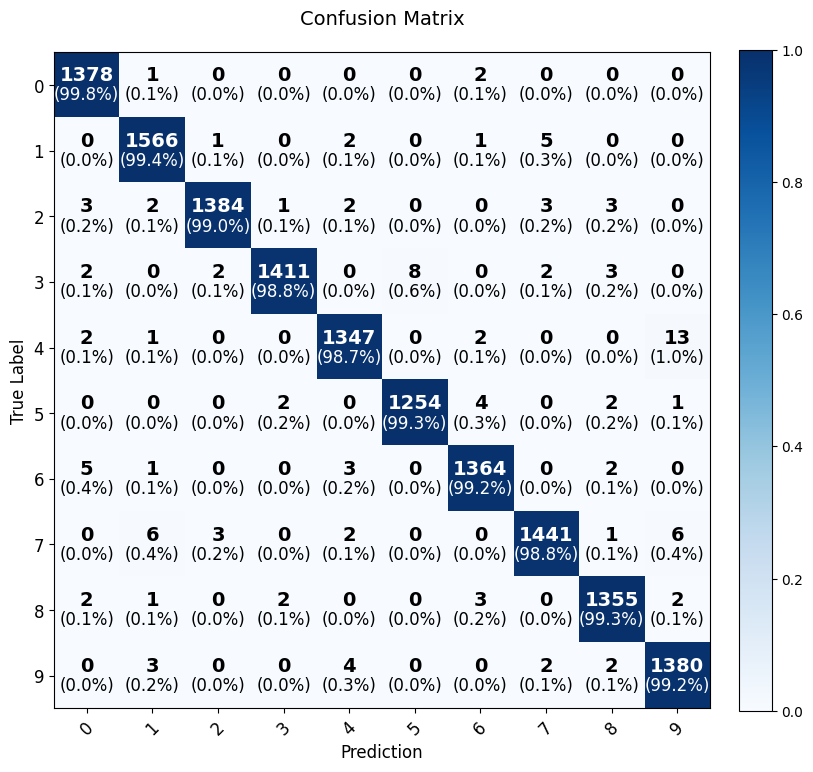

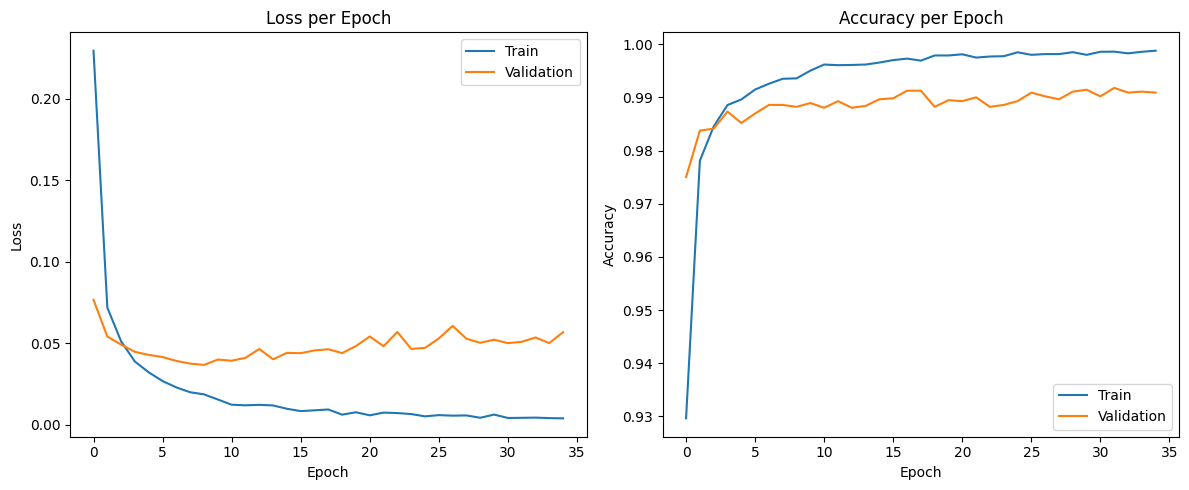

In [ ]:
import torch
from torch import nn, optim
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def load_mnist_data(device, csv_file='mnist_data.csv', test_size=0.2, val_size=0.1, random_state=42):
    """
    Load MNIST data from local CSV file and split into train/validation/test sets.

    Args:
        device: PyTorch device (CPU/GPU)
        csv_file: Path to CSV file containing MNIST data
        test_size: Proportion of data for test set
        val_size: Proportion of training data for validation set
        random_state: Random seed for reproducibility

    Returns:
        Tuple of (X_train, X_val, X_test, y_train, y_val, y_test) as PyTorch tensors
    """
    print(f"Loading MNIST data from {csv_file}...")

    # Read CSV file
    df = pd.read_csv(csv_file)

    # Separate features (pixels) from labels (class)
    pixel_columns = [col for col in df.columns if col.startswith('pixel')]
    X = df[pixel_columns].values.astype('float32')
    y = df['class'].values.astype(int)

    print(f"Data loaded: {X.shape[0]} samples with {X.shape[1]} features")

    # Reshape to 28x28 images and normalize to [0, 1]
    X = X.reshape(-1, 28, 28, 1) / 255.0

    # Split into train+val and test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )

    # Split train into train and validation
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=val_size, stratify=y_train, random_state=random_state
    )

    # Convert labels to PyTorch tensors
    y_train = torch.tensor(y_train, device=device, dtype=torch.long)
    y_val = torch.tensor(y_val, device=device, dtype=torch.long)
    y_test = torch.tensor(y_test, device=device, dtype=torch.long)

    # Convert images to PyTorch tensors with proper channel ordering
    # Change from (batch, height, width, channels) to (batch, channels, height, width)
    X_train = torch.tensor(X_train, device=device, dtype=torch.float32).permute(0, 3, 1, 2)
    X_val = torch.tensor(X_val, device=device, dtype=torch.float32).permute(0, 3, 1, 2)
    X_test = torch.tensor(X_test, device=device, dtype=torch.float32).permute(0, 3, 1, 2)

    print(f"Training: {X_train.size(0)}, Validation: {X_val.size(0)}, Test: {X_test.size(0)}")
    return X_train, X_val, X_test, y_train, y_val, y_test


def create_mnist_cnn(num_classes=10):
    """
    Functional version of the MNIST CNN model using nn.Sequential.
    """
    return nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Flatten(),
        nn.Linear(7 * 7 * 64, 128),
        nn.ReLU(inplace=True),
        nn.Linear(128, num_classes),
        nn.Softmax(dim=1)
    )


def calculate_accuracy(predictions, targets):
    """Calculate accuracy from predictions and targets."""
    batch_size = targets.size(0)
    correct = (predictions == targets).sum().item()
    return correct / batch_size


def train_model(model, X_train, y_train, X_val, y_val, epochs=10, batch_size=32, learning_rate=0.001):
    """
    Train the CNN model.

    Args:
        model: PyTorch model to train
        X_train, y_train: Training data and labels
        X_val, y_val: Validation data and labels
        epochs: Number of training epochs
        batch_size: Batch size for training
        learning_rate: Learning rate for optimizer

    Returns:
        Dictionary containing training history
    """
    num_batches = (X_train.size(0) + batch_size - 1) // batch_size

    print(f"Training model with {X_train.size(0)} samples for {epochs} epochs")
    print(f"Each epoch has {num_batches} batches of size {batch_size}")
    print(f"Validating with {X_val.size(0)} samples")

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training history
    history = {'loss': [], 'val_loss': [], 'acc': [], 'val_acc': []}

    # Training loop
    for epoch in tqdm(range(epochs), desc='Training Progress'):
        model.train()  # Set model to training mode
        epoch_loss = 0.0
        epoch_acc = 0.0

        # Mini-batch training
        for batch_start in range(0, X_train.size(0), batch_size):
            batch_end = min(batch_start + batch_size, X_train.size(0))
            X_batch = X_train[batch_start:batch_end]
            y_batch = y_train[batch_start:batch_end]

            # Forward pass
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)

            # Backward pass
            loss.backward()
            optimizer.step()

            # Calculate metrics
            predictions = torch.argmax(outputs, dim=1)
            accuracy = calculate_accuracy(predictions, y_batch)

            epoch_loss += loss.item()
            epoch_acc += accuracy

        # Calculate average metrics for epoch
        avg_loss = epoch_loss / num_batches
        avg_acc = epoch_acc / num_batches

        # Validation
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val).item()
            val_predictions = torch.argmax(val_outputs, dim=1)
            val_acc = calculate_accuracy(val_predictions, y_val)

        # Store history
        history['loss'].append(avg_loss)
        history['acc'].append(avg_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)

        # Print progress every 5 epochs
        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1}/{epochs} - "
                  f"Loss: {avg_loss:.4f}, Acc: {avg_acc:.4f}, "
                  f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    return history


def evaluate_model(model, X_test, y_test, batch_size=256):
    """
    Evaluate the trained model on test data.

    Args:
        model: Trained PyTorch model
        X_test, y_test: Test data and labels
        batch_size: Batch size for evaluation
    """
    model.eval()
    all_predictions = []

    print(f"Evaluating model on {X_test.size(0)} test samples")

    with torch.no_grad():
        for batch_start in tqdm(range(0, X_test.size(0), batch_size), desc="Evaluating"):
            batch_end = min(batch_start + batch_size, X_test.size(0))
            X_batch = X_test[batch_start:batch_end]

            outputs = model(X_batch)
            predictions = torch.argmax(outputs, dim=1)
            all_predictions.append(predictions.cpu().numpy())

    # Combine all predictions
    all_predictions = np.concatenate(all_predictions)
    y_test_np = y_test.cpu().numpy()

    # Calculate and print metrics
    test_accuracy = accuracy_score(y_test_np, all_predictions)
    print(f"\nTest Accuracy: {test_accuracy:.4f}")
    print(f"\nClassification Report:\n{classification_report(y_test_np, all_predictions)}")
    print(f"\nConfusion Matrix:\n{confusion_matrix(y_test_np, all_predictions)}")


def plot_training_history(history):
    """Plot training and validation loss and accuracy over time."""
    epochs = len(history['loss'])
    print(f"Plotting training history for {epochs} epochs")

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot loss
    ax1.plot(history['loss'], label='Training Loss', color='blue')
    ax1.plot(history['val_loss'], label='Validation Loss', color='red')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)

    # Plot accuracy
    ax2.plot(history['acc'], label='Training Accuracy', color='blue')
    ax2.plot(history['val_acc'], label='Validation Accuracy', color='red')
    ax2.set_title('Training and Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
    print("Training history plot saved as 'training_history.png'")
    plt.show()


def main():
    """Main function to run the complete MNIST training pipeline."""
    # Set device and random seed
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    torch.manual_seed(42)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(42)
    print("Random seed set to 42")

    # 1. Load data
    print("\n" + "="*50)
    print("LOADING DATA")
    print("="*50)
    X_train, X_val, X_test, y_train, y_val, y_test = load_mnist_data(device)

    # 2. Create model
    print("\n" + "="*50)
    print("INITIALIZING MODEL")
    print("="*50)
    model = create_mnist_cnn().to(device)
    print("CNN Model initialized")

    # Print model summary
    try:
        summary(model, input_size=(1, 28, 28))
    except:
        print("Model summary not available (torchsummary may not be installed)")

    # 3. Train model
    print("\n" + "="*50)
    print("TRAINING MODEL")
    print("="*50)
    history = train_model(
        model, X_train, y_train, X_val, y_val,
        epochs=35, batch_size=64, learning_rate=0.001
    )

    # 4. Evaluate model
    print("\n" + "="*50)
    print("EVALUATING MODEL")
    print("="*50)
    evaluate_model(model, X_test, y_test)

    # 5. Plot training history
    print("\n" + "="*50)
    print("PLOTTING RESULTS")
    print("="*50)
    plot_training_history(history)

    print("\n" + "="*50)
    print("ALL DONE!")
    print("="*50)


if __name__ == "__main__":
    main()


# Ejercicio: corrida en el cluster institucional

**¡Cambie mi.usuario.institucional por su usuario en el archivo .sh!**

La corrida en el cluster produce una salida `run_mnist_????.out`. Súbala a Mediación Virtual. Es parte de la tarea. Lea bien las instrucciones abajo.

Para que esto funcione, además, debe crear un ambiente Python. Necesita `uv`. Use `curl` para descargar el instalador y ejecútelo con `sh`:

```bash
curl -LsSf https://astral.sh/uv/install.sh | sh
```

Si su sistema no tiene `curl`, puede utilizar `wget`:

```bash
wget -qO- https://astral.sh/uv/install.sh | sh
```

Luego, una vez instalado `uv` instale Python 3.12 y Pytorch:

```bash
uv venv py3.12_pytorch2 --python 3.12
source py3.12_pytorch2/bin/activate
uv pip install torch torchvision torchaudio
```

Instale también cualquier otra biblioteca necesaria como matplotlib utilizando `uv pip`. Recuerde siempre activar el ambiente antes de ejecutar comandos con `source py3.12_pytorch2/bin/activate`.

## Instrucciones para correr el ejemplo

1. Cargue al cluster institucional el ejercicio Pytorch de red neuronal convolucional con nombre mnist.py.
   
2. Cree un archivo run_mnist.sh con el siguiente contenido:

```bash
#!/bin/bash
#SBATCH --job-name=mnist
#SBATCH --partition=gpu
#SBATCH --account=2025-I-ci0148
#SBATCH --time=1:00:00
#SBATCH --nodes=1
#SBATCH --ntasks-per-node=1
#SBATCH --gpus-per-node=1
#SBATCH --cpus-per-task=16
#SBATCH --gres=gpu:1
#SBATCH --output=run_mnist_%j.out
#SBATCH --error=run_mnist_%j.err
#SBATCH --mail-user=mi.usuario.institucional@ucr.ac.cr
#SBATCH --mail-type=END,FAIL

# Cargar CUDA
module load cuda/12.5

# Configurar CUDA y NVIDIA HPC SDK
export NVHPC_ROOT=/opt/nvidia/hpc_sdk/Linux_x86_64/24.5
export CUDA_HOME=$NVHPC_ROOT/cuda/12.4
export PATH=$CUDA_HOME/bin:$PATH
export LD_LIBRARY_PATH=$CUDA_HOME/targets/x86_64-linux/lib:$LD_LIBRARY_PATH

# Imprimir variables de entorno para diagnóstico
echo "=== Variables de entorno ==="
echo "NVHPC_ROOT: $NVHPC_ROOT"
echo "CUDA_HOME: $CUDA_HOME"
echo "LD_LIBRARY_PATH: $LD_LIBRARY_PATH"
echo ""

# Activar el entorno Python
source /home/mi.usuario.institucional/py3.12_pytorch2/bin/activate

# Verificar que CUDA está funcionando
echo "=== Verificando CUDA con Python ==="
python -c "
import sys
import os
print('Python version:', sys.version)
print('CUDA_HOME:', os.environ.get('CUDA_HOME'))
print('LD_LIBRARY_PATH:', os.environ.get('LD_LIBRARY_PATH'))

import torch
print('\nPyTorch info:')
print('PyTorch version:', torch.__version__)
print('CUDA available:', torch.cuda.is_available())
print('CUDA version:', torch.version.cuda)
if torch.cuda.is_available():
    print('GPU count:', torch.cuda.device_count())
    print('GPU name:', torch.cuda.get_device_name(0))

try:
    import cupy as cp
    print('\nCuPy info:')
    print('CuPy version:', cp.__version__)
    print('CuPy CUDA version:', cp.cuda.runtime.runtimeGetVersion(), '\n')
except Exception as e:
    print('\nError importing CuPy:', str(e), '\n')
"

set -x
# Ejecutar el script
srun python ~/mnist.py
```

3. Puede ver su trabajo en cola con el siguiente comando:

```bash
watch 'squeue --format="%.6i %.9P %.10j %.15u %.2t %.9M %.6D %.4C %.10b %.17R"'
```

4. Debería recibir un correo electrónico si falla o si termina el trabajo. Si falla hay un archivo con extensión .err que indica los errores. Cuando ya corra bien, hay otro archivo .out con la salidad de la corrida.  Suba a Mediación Virtual el archivo .out como prueba de que corrió bien el ejemplo.